<a href="https://colab.research.google.com/github/Shouvik008/alma_shouvik/blob/main/Copy_of_EDA_Zomato_Restaurant_Clustering_And_Sentiments_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Zomato Restaurant Clustering And Sentiments Analysis***

# ***Project Type - Unsupervised***

# ***Name - Shouvik Maity***

Zomato Restaurant reviews
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

**Github id: **

***Project Description***

Zomato, an Indian restaurant aggregator and food delivery start-up, has revolutionized the dining experience in India. With its vast database of restaurant information, menus, and user reviews, Zomato offers customers a convenient way to explore and order from a variety of restaurants.

This project aims to analyze the Zomato restaurant data for each city in India, focusing on both the customers and the company itself. By analyzing customer reviews and sentiments, valuable insights can be derived and visualized through charts and graphs. This will help customers make informed decisions about the best restaurants in their locality, while also enabling the company to identify areas for improvement and growth.

Additionally, the project involves clustering the Zomato restaurants into different segments. This segmentation will help in categorizing restaurants based on factors like cuisine and cost, allowing for a more detailed analysis and comparison. The data, including information on cuisine and costing, can also be used for cost vs. benefit analysis, providing insights into profitability and customer preferences.

Furthermore, sentiment analysis using the customer reviews will help understand the overall sentiment towards restaurants. By leveraging reviewer metadata, it becomes possible to identify industry critics and address their concerns.

Overall, this project focuses on analyzing Zomato's restaurant data to provide valuable insights for customers and the company. Through visualizations, clustering, and sentiment analysis, it aims to enhance the dining experience, support business growth, and drive improvements in the Indian food industry.

Zomato Restaurant names and Metadata
Use this dataset for clustering part

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings

# ***In this project I will follow all the rules given below step by step so that my next move should be clear and everyone can understand.***

1. ***Data Collection:***

*   Gather restaurant data from various sources, such as online review websites or APIs.
*   Collect relevant information, including restaurant details, customer reviews, ratings, and other attributes of interest.

2. ***Data Preprocessing:***

*   Clean the collected data by removing irrelevant or noisy information.
*   Perform text preprocessing tasks like removing stopwords, tokenization, stemming or lemmatization, and handling special characters or punctuation.
*   Convert the text data into a suitable format for further analysis, such as a document-term matrix or TF-IDF matrix.

3. ***Restaurant Clustering:***

*   Apply a clustering algorithm (e.g., K-means, hierarchical clustering) to group
similar restaurants together.
*  Select appropriate features for clustering, such as cuisine type, location, price range, or customer review attributes.
*   Determine the number of clusters using techniques like the elbow method or silhouette analysis.

4. ***Sentiment Analysis:***

*   Train a sentiment analysis model using labeled data (reviews with associated
sentiment labels).
*   Split the dataset into training and testing sets.
*   Apply a suitable machine learning algorithm (e.g., Naive Bayes, Support Vector Machines, or deep learning models like LSTM) to classify the sentiment of customer reviews.
*   Evaluate the performance of the sentiment analysis model using metrics like accuracy, precision, recall, and F1 score.

5. ***Combining Clustering and Sentiment Analysis:***


*   Analyze sentiment within each cluster separately by applying sentiment analysis to the reviews of restaurants within each cluster.
*   Calculate average sentiment scores or sentiment distribution for each cluster.
*   Visualize the results, such as generating sentiment distribution charts or word clouds for each cluster.

6. ***Interpretation and Insights:***


*   Interpret the results and gain insights into customer sentiments across different clusters and restaurant attributes.
*   Identify patterns and trends, such as popular cuisines or sentiment variations based on location or price range.
*   Make data-driven decisions, such as improving services, addressing specific issues, or optimizing marketing strategies based on the insights gained.

7. ***Deployment and Visualization:***


*   Create a user-friendly interface or dashboard to showcase the results and allow users to interact with the data.
*   Utilize visualization libraries (e.g., Matplotlib, Seaborn, Plotly) to create visual representations of the clusters, sentiment distributions, or any other relevant visualizations.





## ***Let's Start !***

***Import Libraries***

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import math
from datetime import datetime
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

***Dataset Loading***

In [ ]:
# Loading both Zomato Restaurant names and Zomato Restaurant reviews Dataset
df1 = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata dataset1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews d2.csv')

***Dataset View***

In [ ]:
# Dataset First Look
#checking the top 5 rows of the names dataset
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
#checking the top 5 rows of the review dataset
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


***Dataset Rows & Columns count***

In [ ]:
# Dataset Rows & Columns count
#checking the number of rows and columns of df1
df1.shape

(105, 6)

In [ ]:
#checking the number of rows and columns of df2
df2.shape

(10000, 7)

# *Dataset Info.*

In [ ]:
#checking the information about the no. of rows, columns, null values and the datatypes of all the columns in df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
#checking the information about the no. of rows, columns, null values and the datatypes of all the columns in df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


# ***Duplicate Values***

In [ ]:
# Dataset Duplicate Value Count
# check duplicates
df1[df1.duplicated()]

,Name,Links,Cost,Collections,Cuisines,Timings


In [ ]:
# Dataset Duplicate Value Count
df2.duplicated().sum()

36

In [ ]:
# Viewing the duplictaed instances
df2[df2.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
#dropping duplicate instances from df2
df2.drop_duplicates(inplace = True)

# ***Missing Value/Null Values***

In [ ]:
# Missing Values/Null Values Count
#Checking Null Values
null_df1= pd.DataFrame({"Total Values": df1.shape[0] , "Total Null values": df1.isnull().sum(),"%a of Null values" : round((df1.isnull().sum()/ df1.shape[0])*100 , 2) })
null_df1.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
Collections,105,54,51.43
Timings,105,1,0.95
Name,105,0,0.00
Links,105,0,0.00
Cost,105,0,0.00
Cuisines,105,0,0.00


Text(0.5, 1.0, 'Missing Values in Dataset')

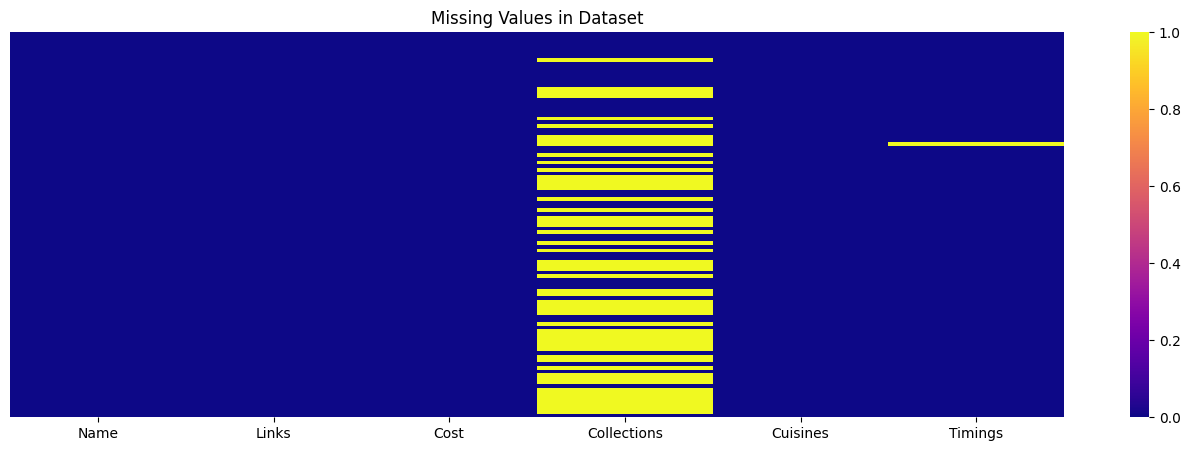

In [ ]:
#vizualizing the null values of each column
plt.figure(figsize=(17, 5))
sns.heatmap(df1.isnull(), cmap='plasma',annot=False,yticklabels=False)
plt.title('Missing Values in Dataset')

In [ ]:
# Missing Values/Null Values Count
#Checking Null Values
null_df2= pd.DataFrame({"Total Values": df2.shape[0] , "Total Null values": df2.isnull().sum(),"%a of Null values" : round((df2.isnull().sum()/ df2.shape[0])*100 , 2) })
null_df2.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
Review,9964,9,0.09
Reviewer,9964,2,0.02
Rating,9964,2,0.02
Metadata,9964,2,0.02
Time,9964,2,0.02
Restaurant,9964,0,0.00
Pictures,9964,0,0.00


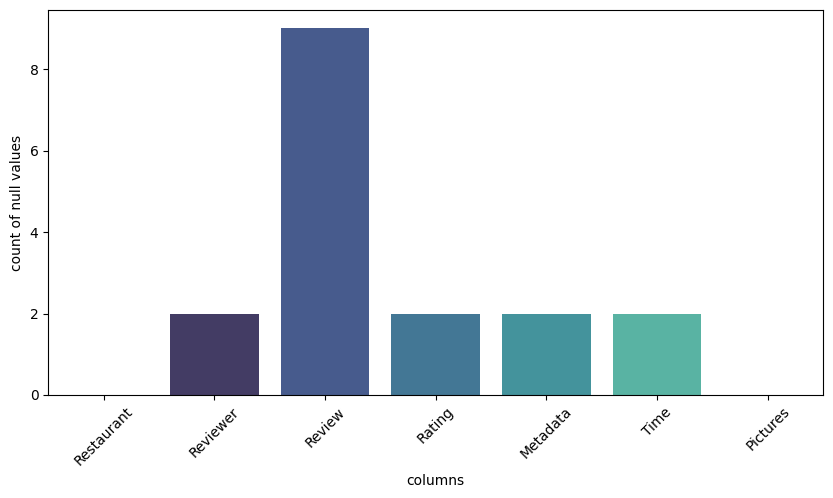

In [ ]:
#vizualizing the columns with their total number of null values
null_df2 = df2.isnull().sum().reset_index()
null_df2.rename(columns = {'index':'columns', 0:'count of null values'}, inplace = True)
plt.figure(figsize=(10, 5))
sns.barplot(x = 'columns',
             y = 'count of null values',
            data = null_df2, palette="mako")
sns.color_palette("mako", as_cmap=True)
plt.xticks(rotation= 45)
plt.show()

# ***What did you know about your dataset?***


*   We have 2 datasets zomato restaurant names and metadata(df1) and zomato restaurant reviews data(df2).
*   There are 105 rows in df1 and 6 columns in the df1 namely 'Name', 'Links', 'Cost', 'Collections', 'Cuisines'and 'Timings'.
*   There are 10000 rows in df1 and 7 columns in the df2 namely 'Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time' and 'Pictures'
Majority of the columns are textual.
*   List itemThere are 36 duplicated instances in df2 and no duplicated instances in df1.
*   We noticed that there were 2 columns Collections(54) and Timmings(1) in df1 whereas 4 columns Reviewer(9), Review(2), Rating(2), Metadata(2) and Time(2) in df2.

# ***Understanding Your Values***

In [ ]:
#checking the columns of df1
df1.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
#checking columns of df2
df2.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

# ***Dataset Describe***

In [ ]:
#checking statistical description of the columns in df1
df1.describe(include='all').round(2)

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
#checking statistical description of the columns in df2
df2.describe(include='all').round(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,9964,9962,9955,9962,9962,9962,9964.00
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.75
std,NaN,NaN,NaN,NaN,NaN,NaN,2.57
min,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.00


# ***Variables Description***
Zomato Resturant Names dataset:

1. Name:
*   It tells the name of Restaurants
*   There are 105 restaurants in the dataset

2. Links:
*   It consists URL Links of Restaurants
*   The URL includes information about the restaurant, including the city name and location within the city.
*   It is observed that 104 restaurants in the dataset are located in the Gachibowli region of Hyderbad, while only one restaurant is located in The Tilt Bar Republic.


3. Cost:
*   It depicts Per person estimated Cost of dining.
*   The costs are in string format and must be changed to integers by eliminating the ",".

4. Collections:
*   It shows the Tagging of Restaurants w.r.t. Zomato categories
*   51.4% data is missing for collection column

5. Cuisines:
*   It shows the variety of Cuisines served by each Restaurants

6. Timings:
*   It displays the restaurant's opening and closing times.
*   It is observed that almost all the restaurants are approximately active from 12 noon to 12 at the midnight. Hence this attribute wouldn't be significant in the analysis.

Zomato Resturant Review dataset:

1. Restaurant:
*   It depicts the name of the restaurant for which customers have left reviews.

2. Reviewer:
*   It consists Name of the Reviewer who have left the reviews
*   There are 2 such instances for which the name of the customer/ reviewer is missing

3. Review:
*   It contains information from customer reviews regarding each restaurant's
ambience, service, meals, and overall experience. It can be utilised for restaurant sentiment analysis.
*   There are 9 such instances for which the reviewes from the customer/ revieweris missing.

4. Rating:
*   It has the Rating Provided by Reviewer ranging from 0 to 5.
*   There are 2 instances with missing values

5. Metadata:
*   Reviewer Metadata - No. of Reviews by each reviewer and followers separated by ",". It can be converted into two integer columns by removing the comma. There are 2 missing values.

6. Time:
*   It shows Date and Time of Review which should be converted from string format to datetime format. There are 2 missing values.

7. Pictures:
*   It contains information about whether or not the reviewers uploaded any pictures

# ***Check Unique Values for each variable.***

In [ ]:
# list_df1 = ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

In [ ]:
# list_df2 = ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
#        'Pictures']

In [ ]:
# Checking Unique Values for each variables in df1 i.e. Zomato Restaurant Name Dataset.
print("Unique values in these categorical features: \n")
for i in list(df1.columns):
  print(f'Unique values in {i}>>>>>>>>>>>>>>>>>>>>>>>  {df1[i].unique()}')
  print('--------------------------------------------------------------------------------------')

Unique values in these categorical features: 

Unique values in Name>>>>>>>>>>>>>>>>>>>>>>>  ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitch

In [ ]:
# Checking Unique Values for each variable in df2 i.e Zomato Restaurant Review Dataset
print("Unique values in these categorical features: \n")
for i in list(df2.columns):
  print(f'Unique values in {i}>>>>>>>>>>>>>>>>>>>>>>>  {df2[i].unique()}')
  print('--------------------------------------------------------------------------------------')

Unique values in these categorical features: 

Unique values in Restaurant>>>>>>>>>>>>>>>>>>>>>>>  ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster

# ***ZOMATO RESTAURANT CLUSTERING***

***Data Wrangling***

Data Wrangling Code

In [ ]:
#dropping collections column
df1.drop('Collections', axis=1, inplace=True)

In [ ]:
#Impute one missing timing row with the mode of the timming column
df1['Timings'].fillna(df1['Timings'].mode()[0],inplace=True)

In [ ]:
# changing the datatype of cost column from strings to integers
df1['Cost'] = df1['Cost'].str.replace(',','')
df1['Cost'] = df1['Cost'].astype('int')

In [ ]:
#dropping null rows in reviews column in df2
df2.dropna(subset = ["Review"], inplace=True)

In [ ]:
# replacing the 'Like' rating with 4 and changing the datatype from strings to float.
df2['Rating'] = df2['Rating'].replace('Like','4')
df2['Rating'] = df2['Rating'].astype('float')

In [ ]:
#Changing the datatype pf Time column from strings to datetime datatype.
df2['Time'] = pd.to_datetime(df2['Time'])

In [ ]:
#checking info of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    int64 
 3   Cuisines  105 non-null    object
 4   Timings   105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [ ]:
#checking info of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9955 non-null   object        
 1   Reviewer    9955 non-null   object        
 2   Review      9955 non-null   object        
 3   Rating      9955 non-null   float64       
 4   Metadata    9955 non-null   object        
 5   Time        9955 non-null   datetime64[ns]
 6   Pictures    9955 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 622.2+ KB


In [ ]:
# checking the value of links in first instance in df1
df1.loc[0,'Links']

'https://www.zomato.com/hyderabad/beyond-flavours-gachibowli'

In [ ]:
#function to extract location of the restaurant
def location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
df1['Location'] = df1['Links'].apply(location)

In [ ]:
# counting the unique locations of the restaurant in hyderabad.
df1.Location.value_counts()

hyderabad             104
thetiltbarrepublic      1
Name: Location, dtype: int64

In [ ]:
#dropping link column
df1.drop('Links', axis=1, inplace=True)

In [ ]:
#We will consider the count of cuisines list as in Cuisines there are values seperated by comma
list_of_cuisins = df1.Cuisines.str.split(', ')

df1['Cuisines_list'] = pd.Series()

for i in range(len(df1)):
  df1['Cuisines_list'][i] = list_of_cuisins[i]

In [ ]:
#creating a feature named as total cuisines out of the cuisines list created above using lamda function and dropping the cusisine column
df1['Total Cuisines'] = df1['Cuisines_list'].apply(lambda x : len(x))
# df1.drop(['Cuisines'],axis=1,inplace=True)

In [ ]:
#checking the top 5 instances to check the manipulations done above in the dataset
df1.head(5)

,Name,Cost,Cuisines,Timings,Location,Cuisines_list,Total Cuisines
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",hyderabad,"[Chinese, Continental, Kebab, European, South ...",6
1,Paradise,800,"Biryani, North Indian, Chinese",11 AM to 11 PM,hyderabad,"[Biryani, North Indian, Chinese]",3
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",hyderabad,"[Asian, Mediterranean, North Indian, Desserts]",4
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,hyderabad,"[Biryani, North Indian, Chinese, Seafood, Beve...",5
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",hyderabad,"[Asian, Continental, North Indian, Chinese, Me...",5


In [ ]:
#creating two columns named as no. of reviews and followers using metadata by removing the comma between the values
# and changing the datatype
#and dropping the column Metadata from the dataset.
df2['No. of Reviews'],df2['Followers']=df2['Metadata'].str.split(',').str
df2['No. of Reviews'] = pd.to_numeric(df2['No. of Reviews'].str.split(' ').str[0])
df2['Followers'] = pd.to_numeric(df2['Followers'].str.split(' ').str[1])
df2 = df2.drop(['Metadata'], axis = 1)
df2.dtypes

Restaurant                object
Reviewer                  object
Review                    object
Rating                   float64
Time              datetime64[ns]
Pictures                   int64
No. of Reviews             int64
Followers                float64
dtype: object

In [ ]:
#checking the top 2 rows in the dataset.
df2.head(2)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No. of Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0


# What all manipulations have you done and insights you found?

Based on the initial overview of both the dataset we did following imputations to make our dataset analysis ready:

1. **Timings:**
Dropping this column since most of the restaurants have same timings in which they operate , so it will not yield any useful information for analysis. 2. **Collections:** Dropping this column because more than 50% of the data are missing in this particular column. 3. **Cost:** Since this column is in object datatype with comma seperated format. We first eliminated the comma from the numbers then we changed the datatype from object to int. 4. **Review:** This column contained null values in some rows so we eliminated those rows which had null values. 5. **Rating:**When we checked the unique values, we discovered that there was an incorrect entry called 'Like,' which was replaced by 4, assuming that someone had liked the restaurant and then we changed the datatype to float. 6. **Time:** We changed the datatype from object to datetime in this column. 7. **Cusines:** It was intially given in class string with comma seperated format , we imputed it with class list so that can be useful for us in extracting different cusines in the same restaurant. We also created another column which represents total cuisines in a particular restaurant. 8.** Links:** From the given Url we extracted the location of the restaurants by string using string indexing. We realised that 104 restaurants were from the same Gachibowli, Hyderabad location and 1 restaurant was from Thetitlebarrepublic location. 9. **Metadata:** We created two columns i.e No. of reviews and followers from the given Metadata by extracing information from it.

In [ ]:
df1.describe()

,Cost,Total Cuisines
count,105.000000,105.000000
mean,861.428571,2.980952
std,510.149730,1.208790
min,150.000000,1.000000
25%,500.000000,2.000000
50%,700.000000,3.000000
75%,1200.000000,4.000000
max,2800.000000,6.000000


# **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Chart - 1 Univariate Analysis**

Text(0.5, 1.0, 'Distribution of Estimated Cost of dining')

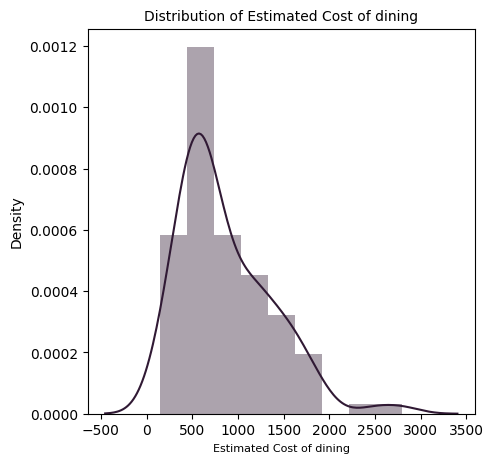

In [ ]:
#Vizualizing the distribution of Cost of Dining using distplot.
sns.distplot(x=df1['Cost'], color = '#301934')
plt.xlabel('Estimated Cost of dining',size=8)
plt.title('Distribution of Estimated Cost of dining',size=10)

**1. Why did you pick the specific chart?**

DISTRIBUTION PLOT

Cost is a numerical feature, and we utilised a distribution plot to see how the cost of dining varied across all restaurants.

2. **What is/are the insight(s) found from the chart?**

From the distribution curve it can be observed that most of restaurants have cost of dinning in the ranging from Rs.200-Rs.1000 and the median cost is around Rs.700

3. **Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This finding regarding the cost distribution can be useful in grouping clients based on their dining costs.

# ***Chart - 2 Univariate Analysis***

Text(0.5, 1.0, 'Count of Restaurants as per the Ratings')

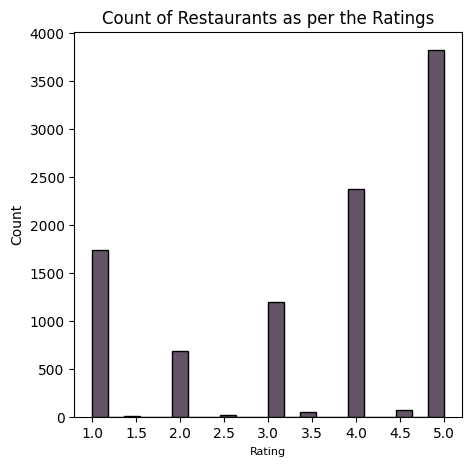

In [ ]:
#vizualizing the restaurants counts based on the ratings given by the reviewers using histogram
sns.histplot(x= df2['Rating'], color = '#301934')
plt.xlabel('Rating',size=8)
plt.title('Count of Restaurants as per the Ratings')

**1. Why did you pick the specific chart?**

HISTOGRAM

We picked histogram because we needed to count the number of restaurants based on the ratings given by the reviewers.

**2. What is/are the insight(s) found from the chart?**

From the univariate analysis of ratings column it is evident that most of the restaurants have been rated 5 followed by ratings of 4.

**3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see there are alot of restaurants with ratings 1 to 3 that need to improved overall specifically restaurants with 1 rating.


# ***Chart - 3 Bivariate Analysis***

In [ ]:
df_merged= df1.merge(df2, how='inner', left_on='Name', right_on='Restaurant')
df_merged.head(1)

,Name,Cost,Cuisines,Timings,Location,Cuisines_list,Total Cuisines,Restaurant,Reviewer,Review,Rating,Time,Pictures,No. of Reviews,Followers
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",hyderabad,"[Chinese, Continental, Kebab, European, South ...",6,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0


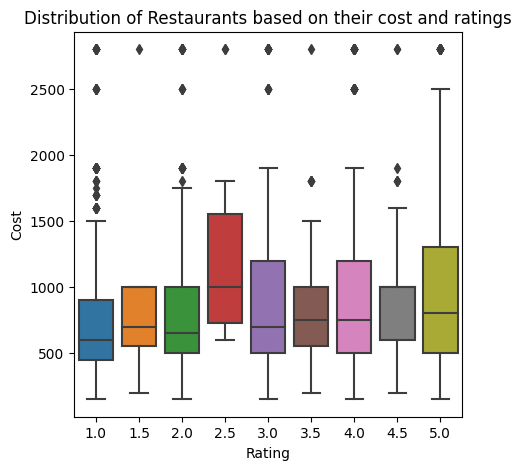

In [ ]:
# plotting box plot cost vs rating
sns.boxplot(x=df_merged.Rating,y= df_merged.Cost)
plt.title("Distribution of Restaurants based on their cost and ratings")
plt.show()

In [ ]:
#checking info of the merged df
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9954
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            9955 non-null   object        
 1   Cost            9955 non-null   int64         
 2   Cuisines        9955 non-null   object        
 3   Timings         9955 non-null   object        
 4   Location        9955 non-null   object        
 5   Cuisines_list   9955 non-null   object        
 6   Total Cuisines  9955 non-null   int64         
 7   Restaurant      9955 non-null   object        
 8   Reviewer        9955 non-null   object        
 9   Review          9955 non-null   object        
 10  Rating          9955 non-null   float64       
 11  Time            9955 non-null   datetime64[ns]
 12  Pictures        9955 non-null   int64         
 13  No. of Reviews  9955 non-null   int64         
 14  Followers       8381 non-null   float64       
dtypes: d

**1. Why did you pick the specific chart?**

BOXPLOT

We used boxplot here as we wanted to know the spread of costs of the restaurants across the different rated restaurants. Boxplot is used here to know the statistical distribution including the median and different quartiles of the data.

**2. What is/are the insight(s) found from the chart?**

From the bivariate analysis of the Ratings and Cost columns we got to know that people do not prefer costly restaurants.



*   Some of the costly restaurants have very less ratings and some of them do have a good rating.
*   The average cost of all type of rated restaurants are almost close to each other

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

As we can see, there isn't a lot of information available on costly restaurants. Most likely because many individuals want to pay less, but we can also see that the Rating 5.0 box is the most vertically elongated, implying that many do not dine in expensive places. They don't go there very often, but the few times they do, they're satisfied.

# ***Chart - 4 Bivariate Analysis***

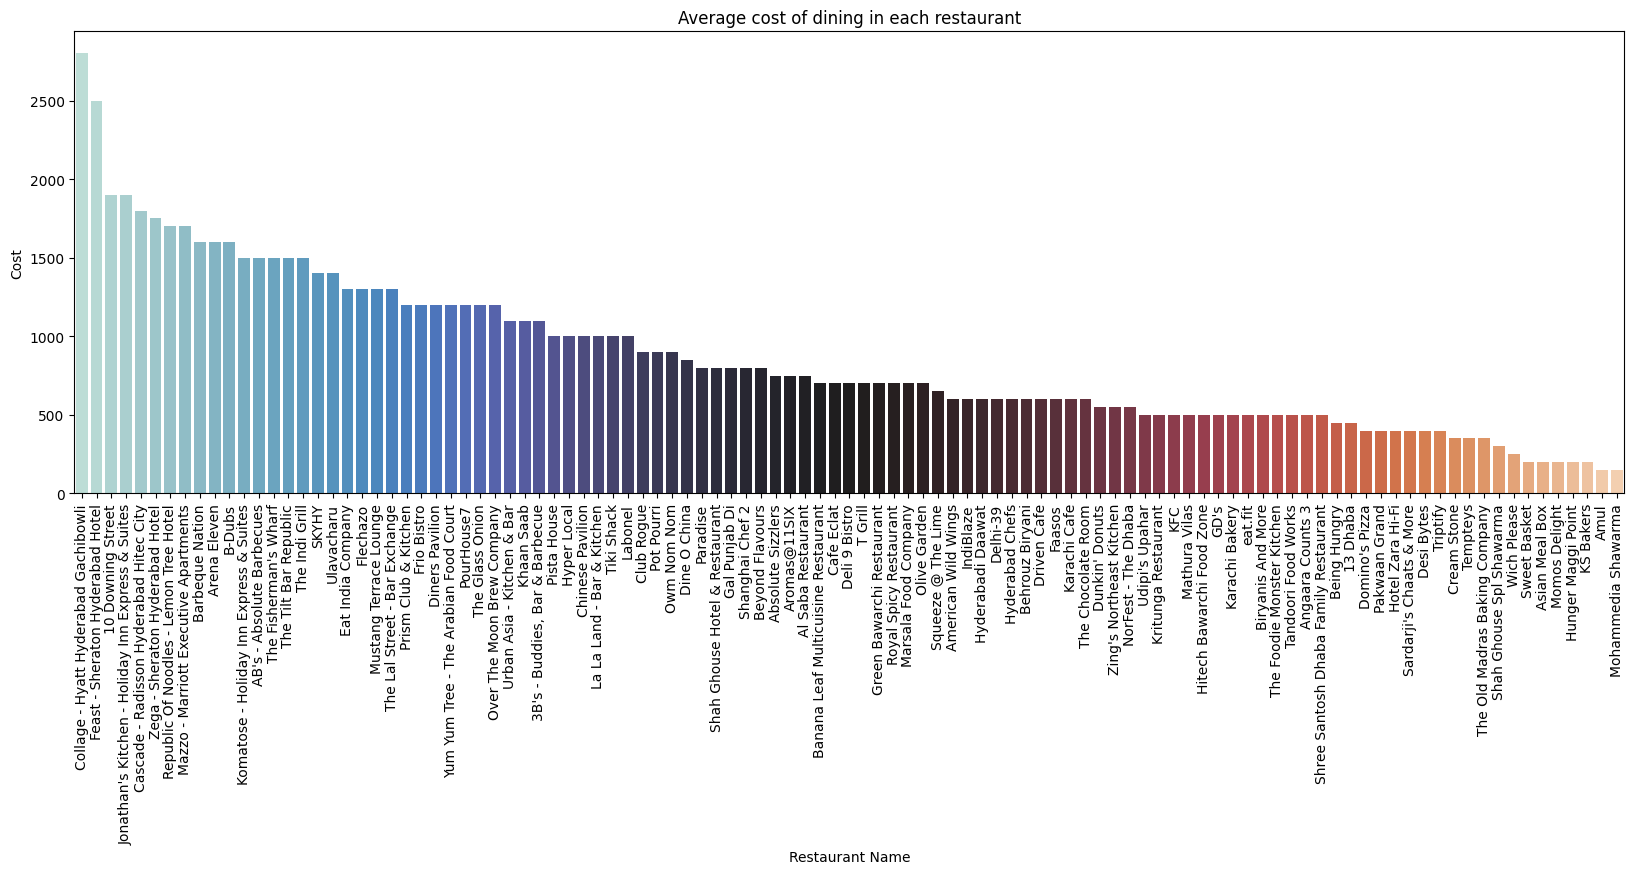

In [ ]:
# average cost of each restaurant
avg_cost_vs_rest= df1.groupby(['Name'])['Cost'].mean().sort_values(ascending=False).reset_index()
avg_cost_vs_rest.sort_values(by = 'Cost',ascending = False,inplace = True)

fig = plt.figure(figsize=[20,6])
sns.barplot(data=avg_cost_vs_rest, x='Name', y= 'Cost', palette ="icefire")
plt.title("Average cost of dining in each restaurant")
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.show()

**1. Why did you pick the specific chart?**

BAR CHART

We are choosing bar chart to visualize the average cost in all 105 restaurant. Since it is bivariate analysis with large number of categories bar chart will be a natural choice.

**2. What is/are the insight(s) found from the chart?**

The chart shows that the College Hyatt Gachibowli restaurant has the highest average cost and the Mohommadia Shawarma restaurant has the lowest average cost. Aside from that, we can see the average cost in descending order on the chart.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, a customer can identify the best-suited restaurant for them based on their budget using the above chart. Restaurant owners can also assess their market position and evaluate their pricing in relation to their competitors.

# ***Chart - 5 Bivariate Analysis***

Text(0, 0.5, 'count of cuisines in all restaurants')

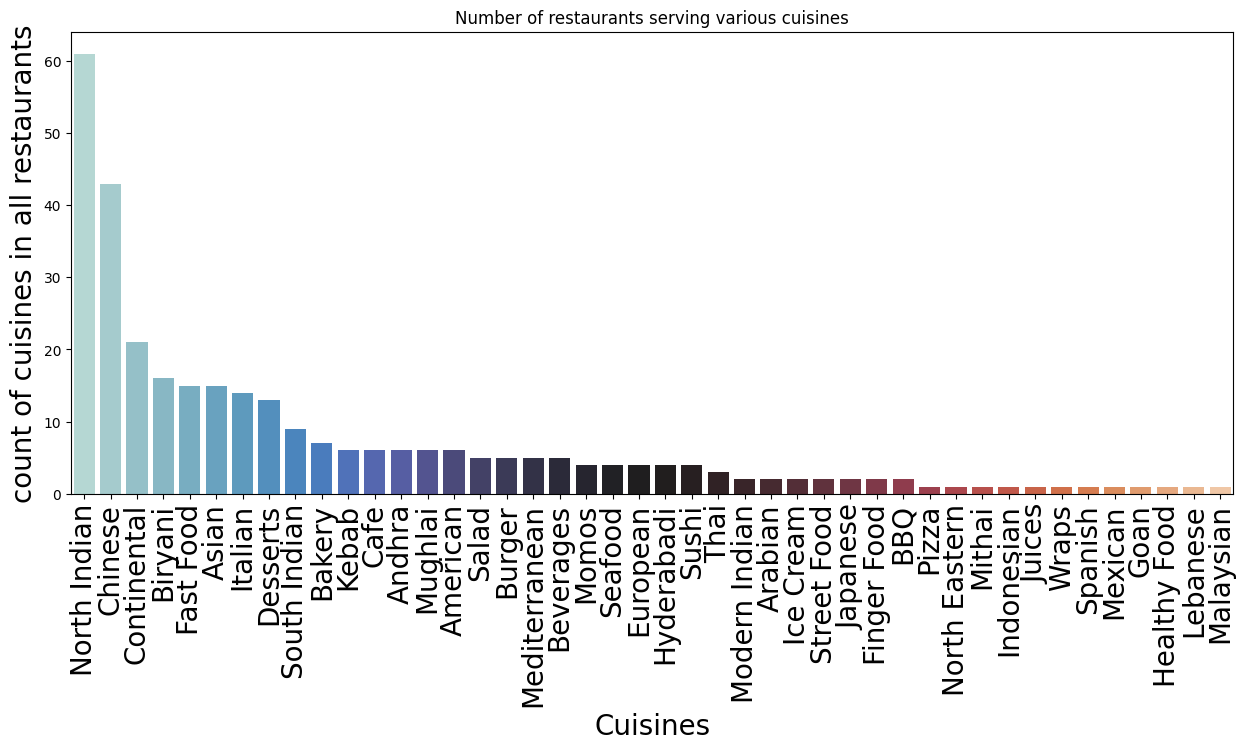

In [ ]:
# Chart - 5 visualization code
#creating a df with columns as cuisines_counts abd cuisines_name
diff_cuisines = {}
for names in list(df1['Cuisines_list']):
    for name in names:
        if (name in diff_cuisines):
            diff_cuisines[name]+=1
        else:
            diff_cuisines[name]=1
cuisines_df = pd.DataFrame(diff_cuisines.values(), diff_cuisines.keys(),columns = ['cuisines_counts']).reset_index()
cuisines_df.sort_values(by = 'cuisines_counts',ascending = False,inplace = True)
cuisines_df.rename(columns={'index':'cuisines_name', 'cuisines_name':'cuisines_counts'},inplace=True)

fig = plt.figure(figsize=[15,6])
sns.barplot(data=cuisines_df, x='cuisines_name', y= 'cuisines_counts',palette ='icefire')
plt.title("Number of restaurants serving various cuisines")
plt.xlabel('Cuisines', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.ylabel('count of cuisines in all restaurants' , fontsize=20)

**1. Why did you pick the specific chart?**

BARPLOT

We have chosen Bar chart to visualize the count of restaurants serving a particular cuisine.

**2. What is/are the insight(s) found from the chart?**

*   North Indian is served in the highest number of restaurants in Hyderabad
followed by Chinese and Continental.
*   Healthy Food, Labanese and Malaysian is served in least number of restaurants

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

There is obviously less market demand for the cuisines offered by a small number of restaurants. Therefore, it may be profitable for the business if the owners use a marketing strategy to raise the visibility of these cuisines and if they offer these cuisines at a discounted price.

# ***Chart - 6 Bivariate Analysis***

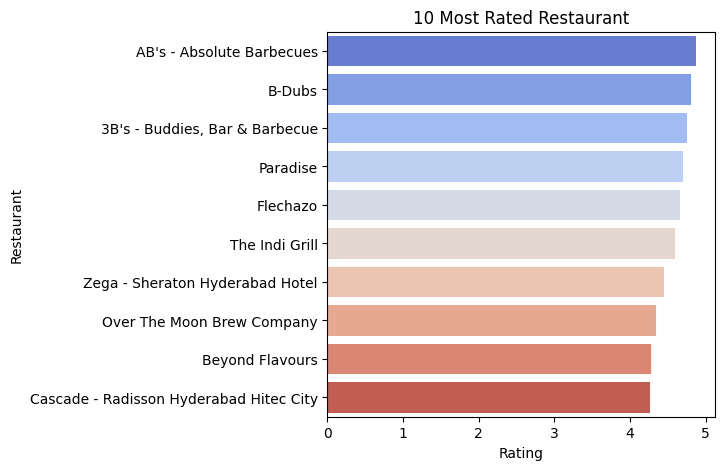

In [ ]:
# Chart - 6 visualization code
#Will check best restaurants in terms of rating
top_restaurants= df2.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Rating', y='Restaurant', data=top_restaurants.sort_values(ascending=False, by='Rating')[:10],palette ='coolwarm' )
plt.title('10 Most Rated Restaurant')

plt.show()

**1. Why did you pick the specific chart?**

BARPLOT

We picked the column chart to visualize the top 10 highest rated restaurants in the market.

**2. What is/are the insight(s) found from the chart?**

AB - Absolute Barbique is the highest rated restaurant, other restaurant in the list has also similar ratings which is more than 4.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

From the chart above restaurant owners can assess the quality standards that these restaurants serves and based on that other restaurant can replicate the similar quality srandards and hence they can improve their business.

# ***Chart - 7 Bivariate Analysis***

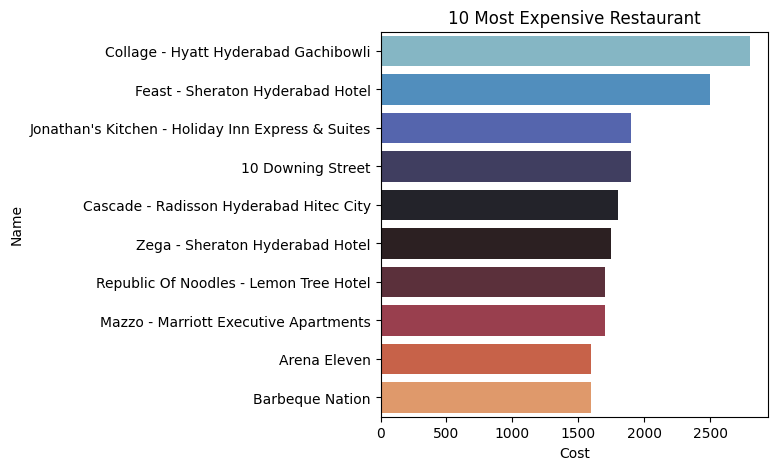

In [ ]:
# Chart - 7 visualization code
# top 10 most expensive restaurant
sns.barplot(x='Cost', y='Name', data=df1.sort_values(ascending=False, by='Cost')[:10],palette ='icefire')
plt.title('10 Most Expensive Restaurant')
plt.show()

**1. Why did you pick the specific chart?**

We chose column chart to visualize the top 10 expensive restaurant .Since it is a bivariate analysis of categorical data vs continuous data. Column chart is apt in this scenario.

**2. What is/are the insight(s) found from the chart?**

Collage-Hayatt Gachibowli restaurant is the most expensive restaurant in the market, followed by Feast - Sheraton Hydrabad hotel by a narrow margin. The other eight restaurants on the list are significantly less expensive than the first two.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

As we know from the earliar analysis that customers are going for affordable restaurant more often, So the expensive restaurant has very niche customer base. If they reconsider there price point they could target the masses.


# ***Chart - 8 MULTIVARIATE ANALYSIS***

# Chart - 8 visualization code

In [ ]:
#creating a dataframe top rated df
top_rated_df= df_merged.groupby('Name',as_index=False)[['Rating','Cost']]\
            .mean().round(2).sort_values(ascending=False,by='Rating').head(15)

In [ ]:
#creating a dataframe expensive rest df
expensive_rest_df= df_merged.groupby('Name',as_index=False)[['Rating','Cost']]\
            .mean().round(2).sort_values(ascending=False,by='Cost').head(15)

In [ ]:
#creating a function to vizualize spines
def prettyprint_spines(ax, right_border=True):
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

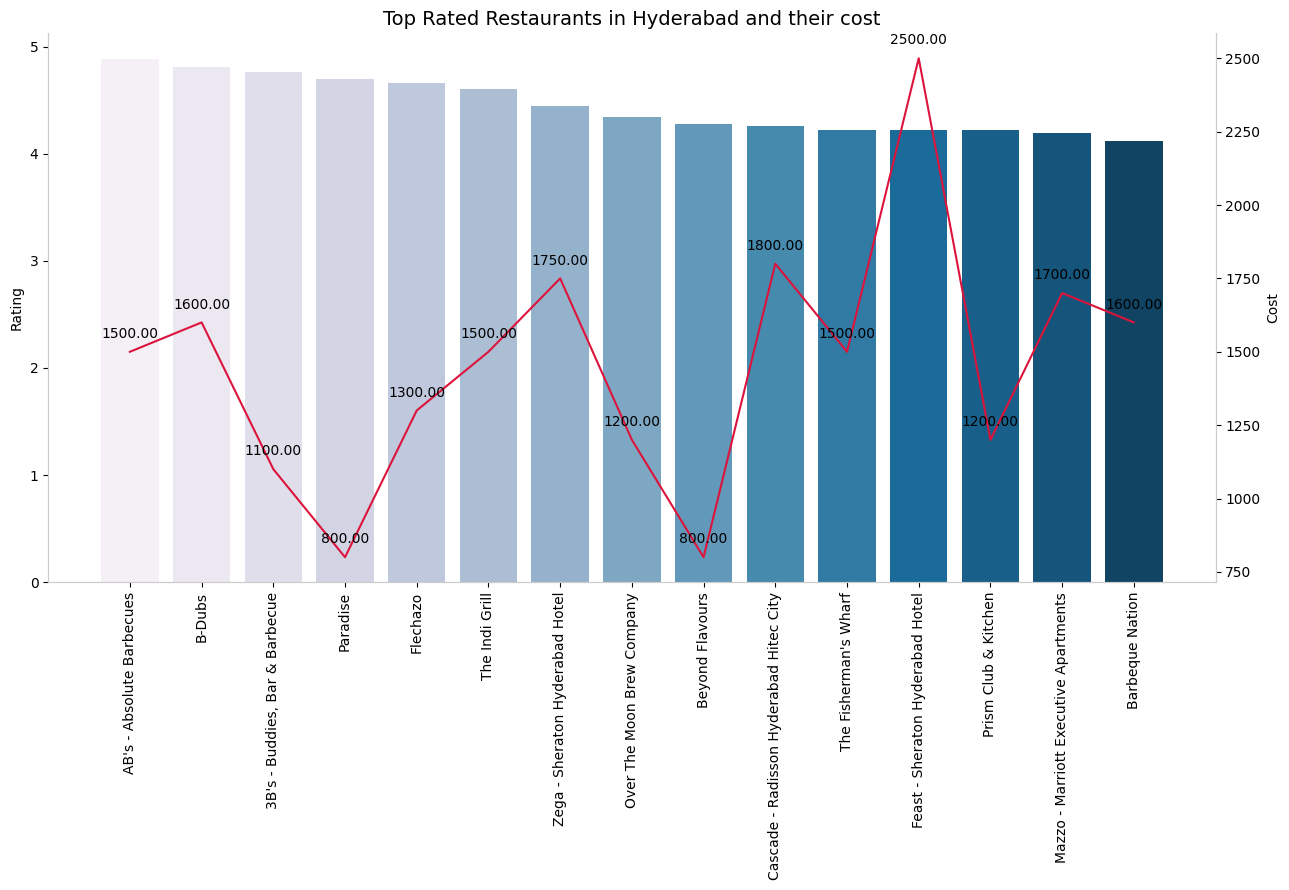

In [ ]:
#vizualising top expensive restaurant and their ratings as well as most rated restaurant and their costs using bar chart and spines
fig, ax = plt.subplots(figsize=(13, 9))
sns.barplot(x='Name', y='Rating', data=top_rated_df, ax=ax, palette='PuBu')
ax2 = ax.twinx()
sns.lineplot(x='Name', y='Cost', data=top_rated_df, ax=ax2, color='crimson', sort=False)

ax.tick_params(axis='x', labelrotation=90)
prettyprint_spines(ax, right_border=True)
prettyprint_spines(ax2, right_border=True)
ax.xaxis.set_label_text("")

xs = np.arange(0,20,1)
ys =top_rated_df['Cost']

for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black',
                 clip_on=True)
ax.set_title('Top Rated Restaurants in Hyderabad and their cost', size=14)
ax.set_ylabel('Rating')
ax2.set_ylabel('Cost')
plt.tight_layout()
plt.show()

# ***Chart - 9 MULTIVARIATE ANALYSIS***

# Chart - 9 visualization code

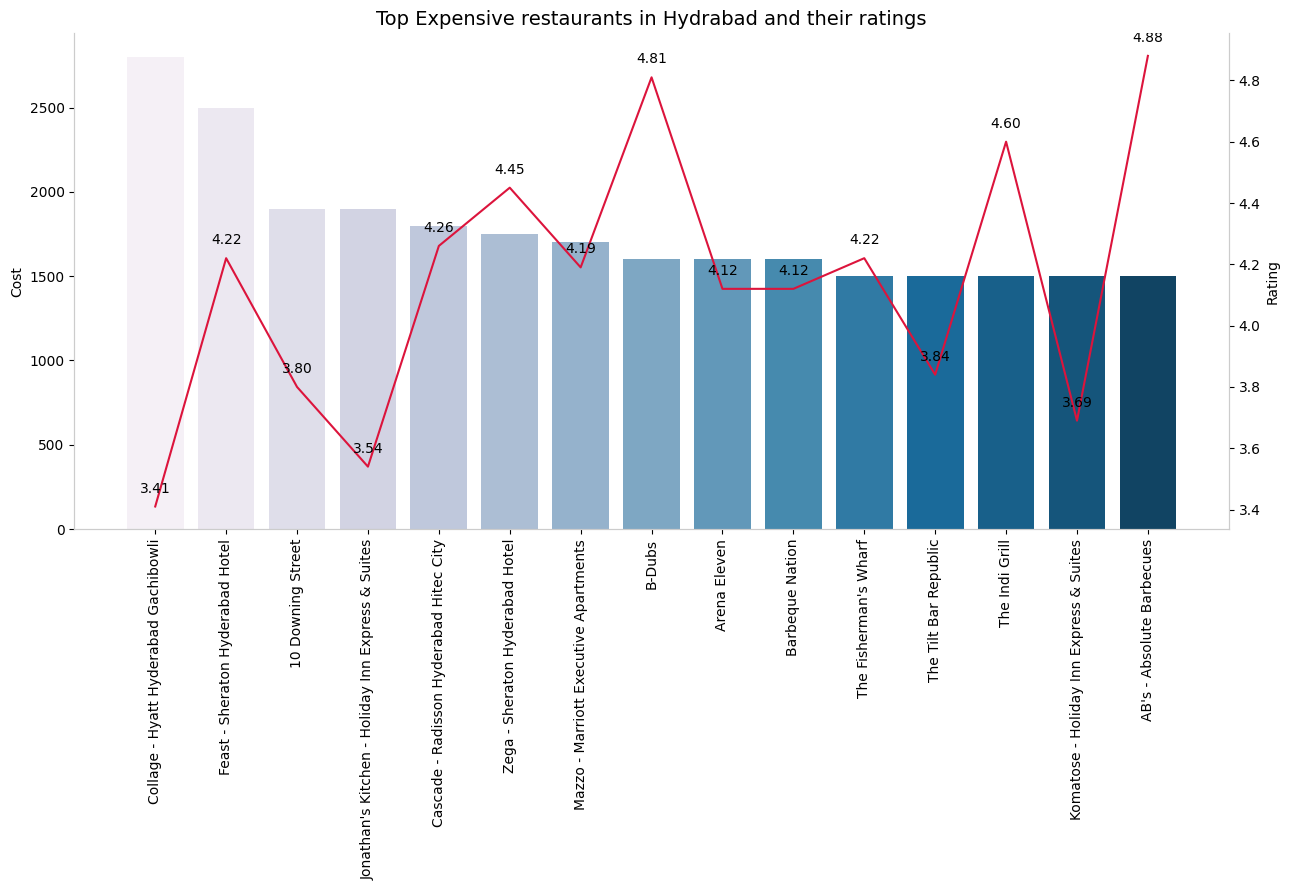

In [ ]:
#Expensive Restaurants in Hyderabad with ratings
fig, ax = plt.subplots(figsize=(13, 9))
sns.barplot(x='Name', y='Cost', data=expensive_rest_df,ax=ax, palette='PuBu')
ax2 = ax.twinx()
sns.lineplot(x='Name', y='Rating', data= expensive_rest_df, ax=ax2, color='crimson', sort=False)

ax.tick_params(axis='x', labelrotation=90)
prettyprint_spines(ax, right_border=True)
prettyprint_spines(ax2, right_border=True)
ax.xaxis.set_label_text("")

xs = np.arange(0,20,1)
ys = expensive_rest_df['Rating']

for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 color='black',
                 clip_on=True)
ax.set_title('Top Expensive restaurants in Hydrabad and their ratings', size=14)
ax.set_ylabel('Cost')
ax2.set_ylabel('Rating')
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

We used a column chart with a spine chart on top to depict the Top Rated Restaurants in Hyderabad and their dining costs, as well as the Top Expensive Restaurants in Hyderabad and their reviewer ratings. Because this is a bivariate analysis of categorical vs. continuous data. In this case, a column chart and a line chart are appropriate.

**2. What is/are the insight(s) found from the chart?**

*   Some of the restaurants with very high reviews are not particularly pricey.
Paradise Restaurant, for example, or Beyond Flavours Restaurant.
*   Collage - Hyyat Hyderabad Gachibowli and Janathan's Kitchen are among Hyderabad's most costly restaurant, with a rating of 3.41 and 3.54 respectively. As a result, if quality is not maintained, this restaurant may lose business.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

*   Based on the analysis above any restaurant owner can determine the gaps between
their price point and the average ratings they receive, based on that they can come to conclusion whether they need to level up the services they provide or they need to reconsider their price point to maintain their position in the market or to perform better than earlier.


# **Chart - 10 - Correlation Heatmap**

<Axes: >

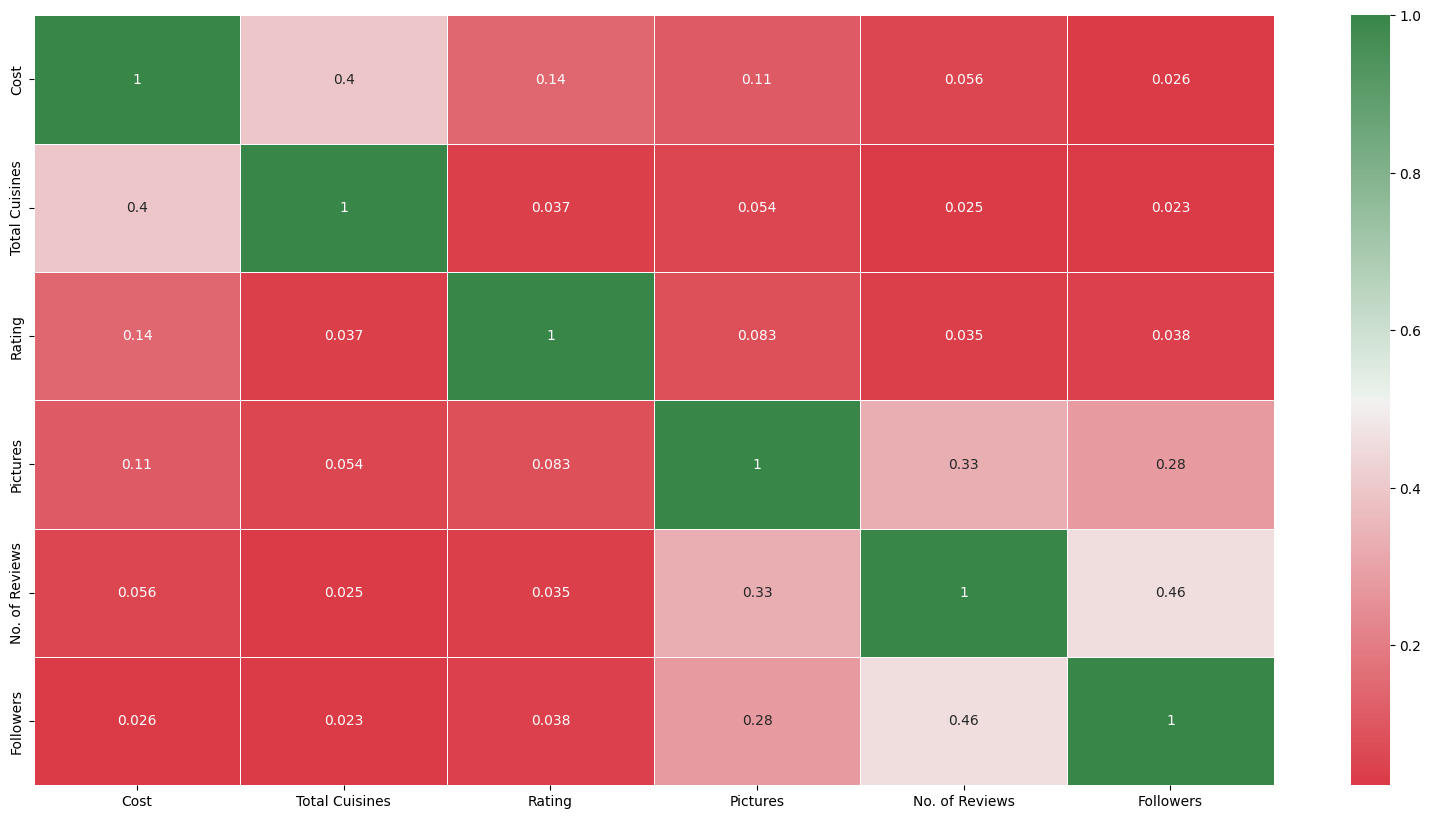

In [ ]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df_merged.corr(),ax = ax, annot=True, cmap=sns.diverging_palette(10, 133, as_cmap=True), linewidths=0.5)

1. Why did you pick the specific chart?

This graph is used to check the correlation between all the variables. We have used it to gain insight about the presence of multicollinearity in our dataset.

2. What is/are the insight(s) found from the chart?

We can see that our dataset is free from the problem of Multicollinearity as none of the independent variables are correlated with each other.


# ***Chart - 11 - Pair Plot***

In [ ]:
# Pair Plot visualization code
sns.pairplot(data = df_merged)

1. Why did you pick the specific chart?

A pair plot allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for follow-up analysis.

2. What is/are the insight(s) found from the chart?

We can see there is no significant correlation between the given features in the merged_df.

# ***Hypothesis Testing***

Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [ ]:
#helper functions for hypothesis testing
class statistic:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [ ]:
#calculating variance
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)

In [ ]:
#creating instance of the class
statistic = statistic()

In [ ]:
#creating a function
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

In [ ]:
#applying udf
zcdf = lambda x: norm(0,1).cdf(x)

In [ ]:
#defining udf for hypothesis testing
def p_value(z,tailed):
  z=round(zcdf(z),10)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

# **Hypothetical Statement - 1**

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
***Lets formualte our hypothesis where we considerd that mean cost is 900.***

*  Null Hypothesis H0 : ℳ = 900 , Mean cost is 900
*  Alternative Hypothesis H1 : ℳ !=1000 , Mean cost is not 900

# ***2. Perform an appropriate statistical test.***

In [ ]:
# Perform Statistical Test to obtain P-Value
relevant_df = df1['Cost'].copy()
hypothesis_mean = 900
size = 50

relevant_df = relevant_df[:55]
std = np.std(relevant_df)
sample_mean = np.mean(relevant_df)
z = statistic.mean(hypothesis_mean,sample_mean,size,std)
p = p_value(z,'d')
print(conclusion(p))

**Which statistical test have you done to obtain P-Value?**

We have calculated z-score for mean when standard deviation was known to obtain p-value, We have conducted two tailed test in this case.

**Why did you choose the specific statistical test?**

A z-test is used in hypothesis testing to evaluate whether a finding or association is statistically significant or not. In particular, it tests whether two means are the same (the null hypothesis). A z-test can only be used if the population standard deviation is known and the sample size is 30 data points or larger.

**Hypothetical Statement - 2**

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

***Average rating by the customer is 3.5***

*   Null Hypothesis H0 : ℳ = 3.5 , Mean duration is 3.5
*   Alternative Hypothesis H1 : ℳ !=3.5 , Mean duration is not 3.5

# ***2. Perform an appropriate statistical test.***

In [ ]:
# Perform Statistical Test to obtain P-Value
relevant_df = df2['Rating'].copy()
hypothesis_mean = 3.5
size = 150

relevant_df = relevant_df[:150]
std = np.std(relevant_df)
sample_mean = np.mean(relevant_df)
z = statistic.mean(hypothesis_mean,sample_mean,size,std)
p = p_value(z,'d') #two tailed test
print(conclusion(p))

Which statistical test have you done to obtain P-Value?

We have calculated **z-score** for mean when standard deviation was known to obtain p-value, We have conducted two tailed test in this case.

Why did you choose the specific statistical test?

A z-test is used in hypothesis testing to evaluate whether a finding or association is statistically significant or not. In particular, it tests whether two means are the same (the null hypothesis). A z-test can only be used if the population standard deviation is known and the sample size is 30 data points or larger.

# ***Hypothetical Statement - 3***

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


*   Null Hypothesis(H0) - Restaurants which serves greater variety of cuisines are
costly.
*   Alternative Hypothesis(H1) - There is no relation between no. of cuisines and cost.



# ***2. Perform an appropriate statistical test.***

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# defining the table
data = [df1['Total Cuisines'], df1['Cost']]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (failed to reject H0)')

**Which statistical test have you done to obtain P-Value?**

A chi-square test is used in statistics to test the independence of two events.

**Why did you choose the specific statistical test?**

A chi-square test is used in statistics to test the independence of two variables. Our aim was to know whether age is related to the response variable or not so we used this test here.


# ***Feature Engineering & Data Pre-processing***

In [ ]:
#checking 1st instance of top_restaurants df
top_restaurants.head(1)

In [ ]:
#creating a new dataframe df3 with Name, Cost, Cuisines and Total Cuisines as Columns and renaming Name as Restaurant
df3 = df1[['Name','Cost','Cuisines','Total Cuisines']]
df3=df3.rename(columns = {'Name': 'Restaurant'})

In [ ]:
#creating a cluster_df by merging top_restaurants and df3
cluster_df = df3.merge(top_restaurants, how='left',on = 'Restaurant' )

In [ ]:
#checking 1st instance of df2
df2.head(1)

In [ ]:
#to extract no. of reviews and number of followers
#creating 2 dfs -Total_followers and Total reviews by using some group by operations
Total_followers = pd.DataFrame(df2.groupby(['Restaurant'])['No. of Reviews'].sum().reset_index())
Total_reviews = pd.DataFrame(df2.groupby(['Restaurant'])['Followers'].sum().reset_index())

In [ ]:
#merging the two above created df into the cluster df
cluster_df = cluster_df.merge(Total_followers, how='left',on = 'Restaurant' )
cluster_df = cluster_df.merge(Total_reviews, how='left',on = 'Restaurant' )

In [ ]:
#finally checking the 1st row of cluster_df
cluster_df.head(1)

In [ ]:
#checking info of cluster_df
cluster_df.info()

In [ ]:
#checking statistical summary of cluster_df
cluster_df.describe()

# ***1. Handling Missing Values***

In [ ]:
#KNN to find the missing values
#importing StandardScaler and KNNImputer to impute
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

#Let's define the scaler and imputer objects
scaler = StandardScaler()
imputer = KNNImputer()

# Impute the missing values with KNN if any
cluster_df['Rating'] = imputer.fit_transform((cluster_df['Rating'].values.reshape(-1,1)))
cluster_df['No. of Reviews'] = imputer.fit_transform((cluster_df['No. of Reviews'].values.reshape(-1,1)))
cluster_df['Followers'] = imputer.fit_transform((cluster_df['Followers'].values.reshape(-1,1)))

In [ ]:
#checking statistical summary of cluster_df
cluster_df.info()

**What all missing value imputation techniques have you used and why did you use those techniques?**

We have used KNN Imputer KNN Import by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques. k-Nearest Neighbours (kNN) that identifies the neighboring points through a measure of distance and the missing values can be estimated using completed values of neighboring observations.


# ***2. Handling Outliers***

In [ ]:
# Handling Outliers & Outlier treatments
from scipy import stats
z = np.abs(stats.zscore(cluster_df[['Cost','Total Cuisines','Rating','No. of Reviews','Followers']]))
print(z)
cluster_df=cluster_df[(z<3).all(axis=1)]
cluster_df.shape

In [ ]:
# plotting box plot to check for the outliers in each feature
nrows = len(['Cost','Total Cuisines','Rating','No. of Reviews','Followers'])
fig, axes = plt.subplots(ncols=1,
                         nrows=nrows,
                         figsize=(15,nrows*2))
plt.subplots_adjust(hspace=1)

for i, var in enumerate(['Cost','Total Cuisines','Rating','No. of Reviews','Followers']):
    sns.boxplot(cluster_df[var], orient='h', ax=axes[i])

fig.suptitle('Box Plots Highlighting Outliers', fontweight='bold')
plt.show()

In [ ]:
#checking statistical summary of cluster_df
cluster_df.info()

What all outlier treatment techniques have you used and why did you use those techniques?

We have used **Z score technique** to detect and treat the outlier Z score is also called standard score. Z score = (x -mean) / std. deviation If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier. So we have kept all the data points which are within 3 standard deviation and eliminated the others.

# ***3. Categorical Encoding***

In [ ]:
# Encode your categorical columns
numerical_df = cluster_df[['Cost','Total Cuisines','Rating','No. of Reviews','Followers']]
text_df = cluster_df[['Restaurant','Cuisines']]
numerical_df = pd.concat([numerical_df,pd.DataFrame(columns=list(diff_cuisines.keys()))])

In [ ]:
#We will iterate for every row in the dataframe
for i, row in numerical_df.iterrows():
  # We will interate over new columns for every row
  for column in list(numerical_df.columns):
      if column not in ['Cost','Total Cuisines','Rating','No. of Reviews','Followers']:
        # will check if the column is in the list of cuisines available for that row
        if column in text_df['Cuisines']:
          #then assign it as 1 else 0
          numerical_df.loc[i,column] = 1
        else:
          numerical_df.loc[i,column] = 0

In [ ]:
numerical_df.head(1)
numerical_df.columns

**What all categorical encoding techniques have you used & why did you use those techniques?**

We have used **One Hot Encoding** for Cuisines column.

One Hot Encoding means to encode or create additional features for all unique categorical values. So we used this method to create additional features known as dummy variables to fit all the data in the model.

# **4. Textual Data Preprocessing**

(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Textual data was not used in Zomato Restaurant Clustering. This area will be used in the Zomato Restaurant Sentiment Analysis.

# **5. Feature Manipulation & Selection**

**1. Feature Manipulation**

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

All feature manipulations are performed in the data wrangling step, and because there is no multicollinearity in the dataset, no feature manipulations are required here.

# 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

**What all feature selection methods have you used and why?**

We have used Principal Component Analysis in the further which helped for feature selection as well

# **6. Data Transformation**

**Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?**

Since we have treated the outliers above and in the next section we are going to scale the data using Minmax scaler. So we do not need data transformation now.

# **7. Data Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Min max scaler for only numeric columns

# column_names
column_names = list(numerical_df.columns)

#taking columns to do the minmaxscaling
DF_scaled = pd.DataFrame()
#using standardization as both numeric columns are in different scale

scaler = MinMaxScaler()
scaled = scaler.fit_transform(numerical_df)
#print(scaled)
scaled_df = pd.DataFrame(scaler.fit_transform(numerical_df))
scaled_df.columns = column_names

In [ ]:
scaled_df.head(2)

**Which method have you used to scale you data and why?**

We have used MinMax Scaler to scale the data. The feature scaling is used to prevent the models from getting biased toward a specific range of values.

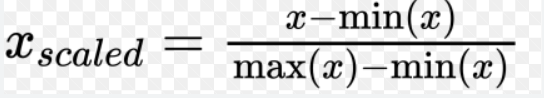

# **8. Dimesionality Reduction**

Do you think that dimensionality reduction is needed? Explain Why?
No. we have not done dimensionality reduction in our dataset

# **9. Data Splitting**

Unsupervised Learning models don't require a train and a test dataset

# **10. Handling Imbalanced Dataset**

We don't have a classification model here. So no handling of imbalanced dataset

# ***ML Model Implementation***

# **ML Model - 1 K MEANS CLUSTERING**

**K-Means Clustering** is an Unsupervised Learning algorithm.The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The k-means clustering algorithm mainly performs two tasks:

*  Determines the best value for K center points or centroids by an iterative process.
*  Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

Hence each cluster has datapoints with some commonalities, and it is away from other clusters.

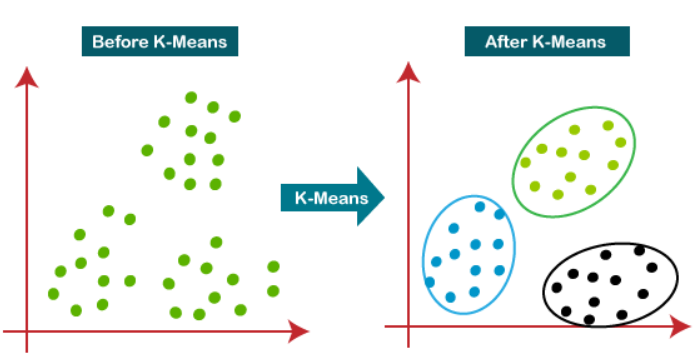

The performance of the K-means clustering algorithm depends upon highly efficient clusters that it forms. But choosing the optimal number of clusters is a big task. There are two most efficient methods to choose optimal number of clusters

1. Elbow Method

2. Silhouette Method

**ELBOW METHOD**

This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:



*   WCSS= ∑Pi in Cluster1 distance(Pi C1)2 +∑Pi in Cluster2distance(Pi C2)2+∑Pi in CLuster3 distance(Pi C3)2

In the above formula of WCSS, ∑Pi in Cluster1 distance(Pi C1)2: It is the sum of the square of the distances between each data point and its centroid within a cluster1 and the same for the other two terms. To measure the distance between data points and centroid, we can use any method such as Euclidean distance or Manhattan distance.

**SILHOUETTE METHOD**

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). Select a range of values of k (say 1 to 10). Plot Silhouette coefﬁcient for each value of K. The equation for calculating the silhouette coefﬁcient for a particular data point:

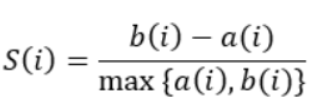



*   S(i) is the silhouette coefficient of the data point i.
*   a(i) is the average distance between i and all the other data points in the cluster to which i belongs.
*   b(i) is the average distance from i to all clusters to which i does not belong.

In [ ]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [ ]:
#Within Cluster Sum of Squared Errors for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(scaled_df)
    wcss.append(km.inertia_)

In [ ]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

In [ ]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid

parameters = list(range(2,11))

parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(random_state = 11)
silhouette_scores = []

for p in parameter_grid:
    kmeans_model.set_params(**p)
    kmeans_model.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans_model.labels_)
    silhouette_scores += [score]
    print('Parameter:', p, 'Score', score)

    if score > best_score:
        best_score = score
        best_grid = p

**PRINCIPAL COMPONENT ANALYSIS**

Principal component analysis, or PCA, is a **dimensionality-reduction** method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So, to sum up, the idea of PCA is simple — **reduce the number of variables of a data set, while preserving as much information as possible.**

In [ ]:
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(scaled_df)

**In a Google colab, rerun this cell to see the HTML version, or trust the notebook. On GitHub, the HTML version might not display correctly. To view it properly, try loading this page with nbviewer.org.**

In [ ]:
#explained variance v/s no. of components
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim([0, 10])

In [ ]:
#choosing right dimension from plot using n_components = 2
from sklearn.decomposition import PCA
transformer = PCA(n_components=2)
transformer.fit(scaled_df)
transformed_df = transformer.transform(scaled_df)
transformed_df.shape

In [ ]:
#visualizing Silhouette Score for individual clusters and the clusters made
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(transformed_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(transformed_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(transformed_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(transformed_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(transformed_df[:, 0], transformed_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')



In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=4, init= 'k-means++', random_state=42)
kmeans.fit(transformed_df)

#predict the labels of clusters.
label = kmeans.fit_predict(transformed_df)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(transformed_df[label == i , 0] , transformed_df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Assigning clusters to our data
cluster_df['clusters'] = kmeans.labels_
# checking how it is working
cluster_df.head()

In [ ]:
# Counting content in each cluster
cluster_content_count = cluster_df['clusters'].value_counts().reset_index().rename(columns={'index':'clusters','clusters':'observations'}).sort_values(by='observations')
cluster_content_count

Text(0.5, 1.0, 'Counting content in each cluster')

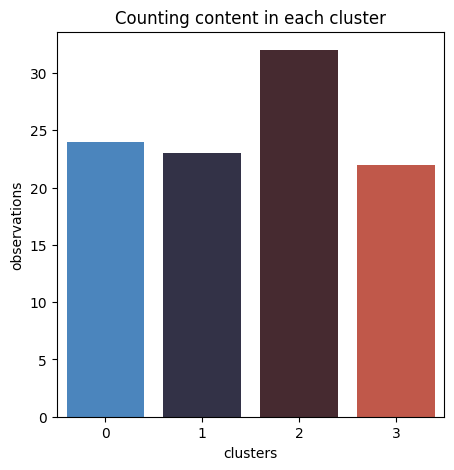

In [ ]:
#vizualizing the no. of restaurants in each clusters
sns.barplot(data=cluster_content_count, x='clusters', y='observations',palette='icefire')
plt.title('Counting content in each cluster')

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

We applied K means Clustering to cluster the Restaurants based on the given features. We used both the Elbow and Silhuoette Methods to get an efficient number of K, and we discovered that n clusters = 4 was best for our model. Then, using the Cumulative Explained Variance, we performed Principal Component Analysis to reduce the dimension to n components = 2. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels. After labelling the clusters, we visualised them and counted the number of restaurants in each cluster, discovering that the majority of the restaurants belonged to the second cluster.

**2. Explain the business impact of the ML model used.**

K means clustering can be useful in customer segmentation based on demographic, psychographic and behavioural data as well as performance data to cluster your consumers for a particular product category. This can be eventually useful in making business strategies for different categories of customers and retain them for further growth of business.

# ML Model - 2 Agglomerative Hierarchical clustering

# Hierarchical clustering

Hierarchial clustering algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:

Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters. Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

# Agglomerative hierarchical clustering
The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets. This hierarchy of clusters is represented in the form of the dendrogram.

# Dendrogram in Hierarchical clustering

The dendrogram is a tree-like structure that is mainly used to store each step as a memory that the HC algorithm performs. In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, and the x-axis shows all the data points of the given dataset.

The working of the dendrogram can be explained using the below diagram:

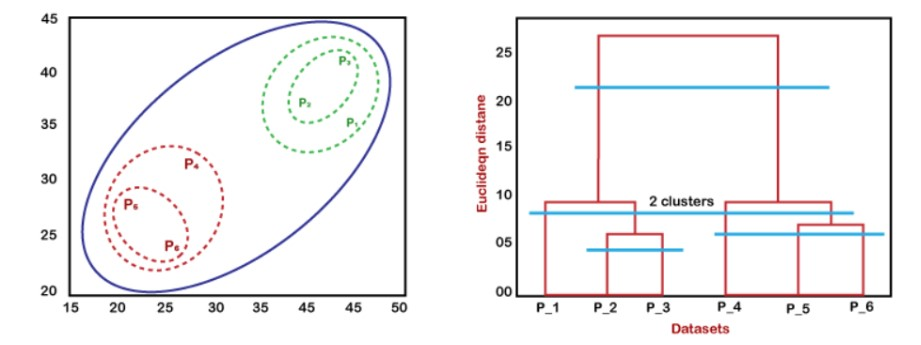



*   In the above diagram, the left part is showing how clusters are created in
agglomerative clustering, and the right part is showing the corresponding dendrogram.
*   firstly, the datapoints P2 and P3 combine together and form a cluster, correspondingly a dendrogram is created, which connects P2 and P3 with a rectangular shape. The height is decided according to the Euclidean distance between the data points.
*   In the next step, P5 and P6 form a cluster, and the corresponding dendrogram is created. It is higher than of previous, as the Euclidean distance between P5 and P6 is a little bit greater than the P2 and P3.
*   Again, two new dendrograms are created that combine P1, P2, and P3 in one dendrogram, and P4, P5, and P6, in another dendrogram.
*   At last, the final dendrogram is created that combines all the data points together.

We can cut the dendrogram tree structure at any level as per our requirement.

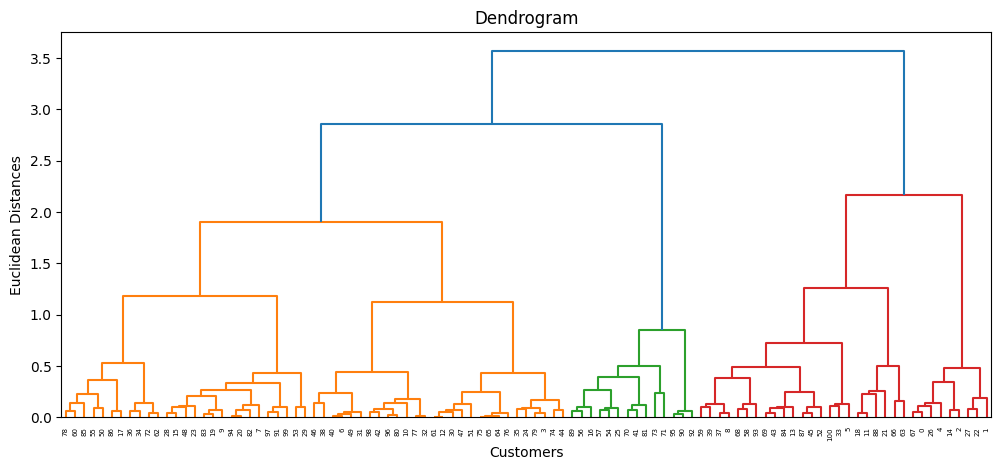

In [ ]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(transformed_df, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show()

In [ ]:
#creating new dataframe X using copy method
X =transformed_df.copy()

In [ ]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)
    score = silhouette_score(X, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.33595038494188645
For n_clusters = 3, silhouette score is 0.3500005679582185
For n_clusters = 4, silhouette score is 0.37379595236513413
For n_clusters = 5, silhouette score is 0.36142052251646034
For n_clusters = 6, silhouette score is 0.3738578758052187
For n_clusters = 7, silhouette score is 0.3901494687958716
For n_clusters = 8, silhouette score is 0.40519940061937604
For n_clusters = 9, silhouette score is 0.415477737001377
For n_clusters = 10, silhouette score is 0.42157623306398034
For n_clusters = 11, silhouette score is 0.4094191424593605
For n_clusters = 12, silhouette score is 0.4086475150709458
For n_clusters = 13, silhouette score is 0.4088608340945439
For n_clusters = 14, silhouette score is 0.4022121798261533
For n_clusters = 15, silhouette score is 0.3980012578048283


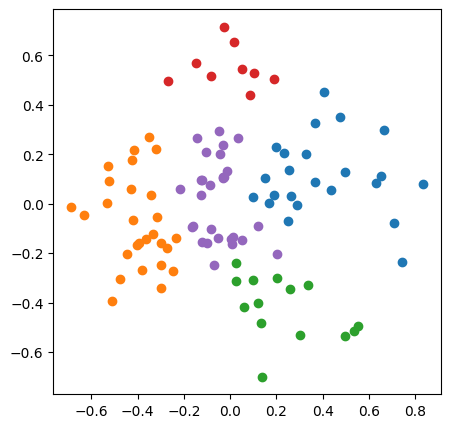

Silhouette Coefficient: 0.361
davies_bouldin_score 0.858


In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define the model
model = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat = model.fit_predict(transformed_df)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(transformed_df[row_ix, 0], transformed_df[row_ix, 1])
# show the plot
pyplot.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(transformed_df,yhat, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(transformed_df, yhat)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(transformed_df, yhat))

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We have used Hierarchial Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a down-top approach to cluster the data. We have used Silhouette Coefficient Score and used clusters = 5 and then vizualized the clusters and the datapoints within it.

# 2. Explain the business impact of the ML model used.

Hierarchical Clustering can help an enterprise organize data into groups to identify similarities and, equally important, dissimilar groups and characteristics, so that the business can target pricing, products, services, marketing messages and more.Once the segments are identified, marketing messages and products can be customized for each segment. The better the segments chosen for targeting by a particular organization, the more successful the business will be in the market.

# **VISUALIZING THE CLUSTERS**

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(cluster_df, y="Cost", x="clusters",color="clusters")
fig.update_traces(marker_size=10)
fig.show()
plt.show()

In [ ]:
fig = px.scatter(cluster_df, y="Rating", x="clusters",color="clusters")
fig.update_traces(marker_size=10)
fig.show()
plt.show()

In [ ]:
fig = px.scatter(cluster_df, y="Cuisines", x="clusters",color="clusters")
fig.update_traces(marker_size=10)
fig.show()
plt.show()

The above visualizations show that each cluster has unique characteristics based on cost, ratings, cuisine, etc.

Cluster 1 - Most Expensive

Cluster 2 - Cheapest

Cluster 0 - Expensive

Cluster 3 - Affordable

# **ZOMATO RESTAURANT - SENTIMENT ANALYSIS**

**SENTIMENT ANALYSIS**

Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

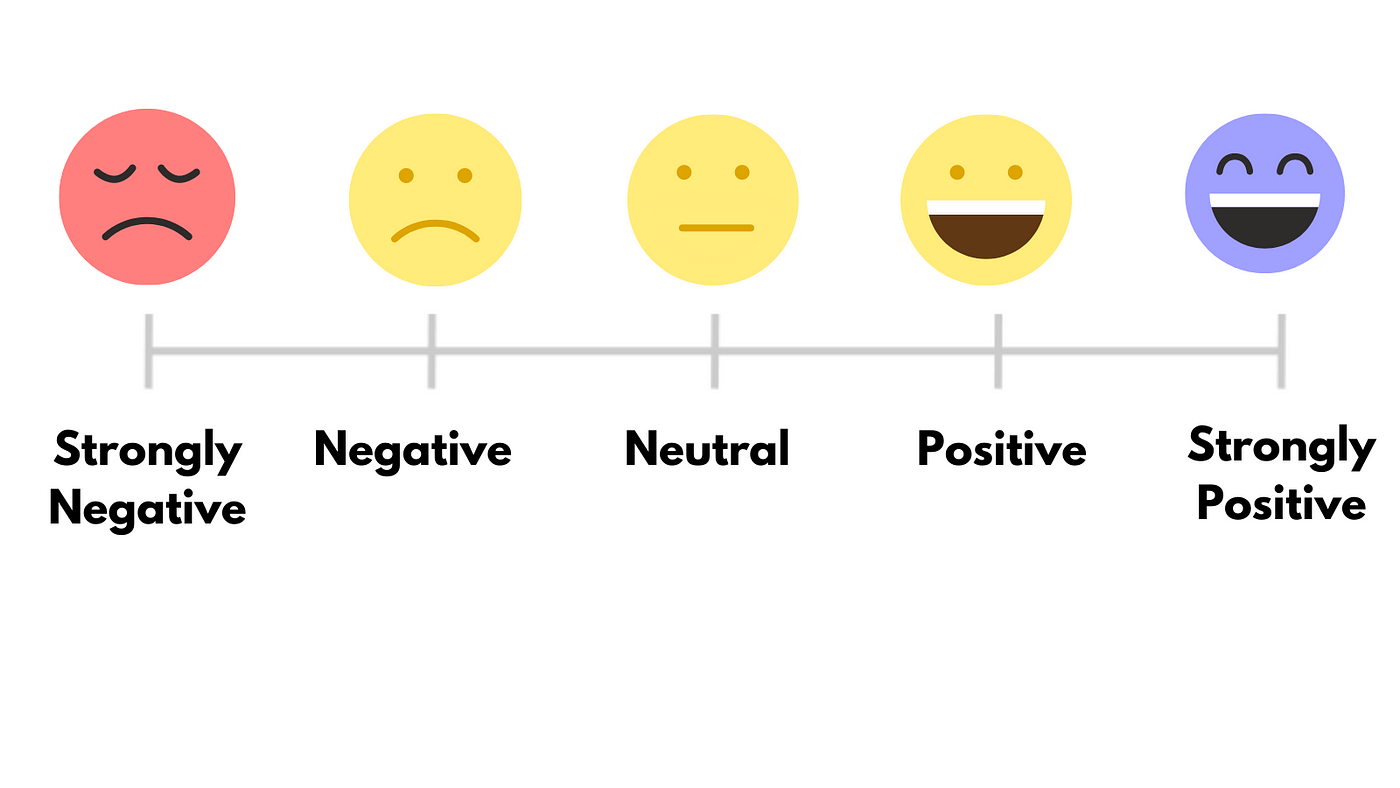

# **Know the Dataset**

**Dataset For Sentiment Analysis**

In [ ]:
# constructing a dataframe with Review and rating column for sentiment analysis
sentiment_df = df2[['Review','Rating']]

In [ ]:
# Dataset Rows & Columns count
sentiment_df.shape

(9955, 2)

**Dataset Information**

In [ ]:
# Dataset Info
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  9955 non-null   object 
 1   Rating  9955 non-null   float64
dtypes: float64(1), object(1)
memory usage: 233.3+ KB


We can see that there are no null values in the dataset.

**Feature Engineering & Data Preprocessing**

**Textual Data Preprocessing**

In [ ]:
#viewing a random row of the review column
sentiment_df['Review'][68]

"Second time being here it's really beyond imagination beyond taste and beyond flavours as well. Very courteous staff and very hospitile.\nTaste is good but the best part is presentation,,, it's really meeting the standard of a 5 star restaurant .\nVery impressed with Mr Ahmed , Pradeep and Mr Dipanajan who are very friendly and took care of us very well. Good job guys keep it up."

**1. Expand Contraction**

In [ ]:
# Expand Contraction
# import library
!pip install contractions
import contractions

In [ ]:
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

**2. Lower Casing**

In [ ]:
# Lower Casing
# making lowercase of review column data
sentiment_df['Review'] = sentiment_df['Review'].str.lower()
sentiment_df.head(3)

,Review,Rating
0,"the ambience was good, food was quite good . h...",5.0
1,ambience is too good for a pleasant evening. s...,5.0
2,a must try.. great food great ambience. thnx f...,5.0


**3. Removing Punctuations**

In [ ]:
# Remove Punctuations from the review column
#text cleaning
import re
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))
sentiment_df['Review'] = sentiment_df['Review'].apply(cleaned)

In [ ]:
#viewing review column in the sentiment df
sentiment_df['Review'][68]

'second time being here it is really beyond imagination beyond taste and beyond flavours as well very courteous staff and very hospitiletaste is good but the best part is presentation it is really meeting the standard of a  star restaurant very impressed with mr ahmed  pradeep and mr dipanajan who are very friendly and took care of us very well good job guys keep it up'

# **4. Removing URLs & Removing words and digits contain digits.**

We don't have any ULRs and such words in the dataset

# **5. Removing Stopwords & Removing White spaces**

In [ ]:
# Remove Stopwords from the dataset
#importing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# extracting the stopwords from nltk library
stopword = stopwords.words('english')

#creating a function to remove stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stopword]
    # joining the list of words with space separator
    return " ".join(text)

sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)

In [ ]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [ ]:
#viewing review column in the sentiment df
sentiment_df['Review'][68]

'second time really beyond imagination beyond taste beyond flavours well courteous staff hospitiletaste good best part presentation really meeting standard star restaurant impressed mr ahmed pradeep mr dipanajan friendly took care us well good job guys keep'


# **6. Text Normalization**

In [ ]:
# Stemming
#import stemmer
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

#applying stemmer
sentiment_df['Review'] = sentiment_df['Review'].apply(stemming)

In [ ]:
#applying Lemmetizer
#download small spacy model
import spacy

!python -m spacy download en_core_web_sm
spacy.load('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')

#Lemmatization funtion
def lemmatization_(sentence):
    doc = nlp(sentence)
    l=list()
    for word in doc:

        l.append(word.lemma_)

    return ' '.join(l)

sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:lemmatization_(x))

2023-09-24 16:31:50.427139: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Which text normalization technique have you used and why?

We have used Stemmer and Lemmetization as text normalization technique to eliminate the repetitiveness of the same word.

**"Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language."** Stem (root) is the part of the word to which you add inflectional (changing/deriving) affixes such as (-ed,-ize, -s,-de,mis). So stemming a word or sentence may result in words that are not actual words. Stems are created by removing the suffixes or prefixes used with a word.( Removing suffixes from a word is called Suffix Stripping)

Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words. For example, runs, running, ran are all forms of the word run, therefore run is the lemma of all these words. Because lemmatization returns an actual word of the language, it is used where it is necessary to get valid words.


# **7. Tokenization**

In [ ]:
#Text Tokenization
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# nltk.download('punkt')
# sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x:word_tokenize(x))

# **8. Part of speech tagging**

In [ ]:
# POS Taging
#Not used here

# Target Variable

In [ ]:
#We will create 2 categories based on the rating by creating a python function
def sentiment(rating):
  if rating >=3.5:
    return 1
    # positive statement
  else:
    return 0
    # negative

In [ ]:
#creating a sentiment column by segreggating the views as positive and negative sentiments by applying lambda function
sentiment_df['sentiment']=sentiment_df['Rating'].apply(lambda x:sentiment(x))
sentiment_df.head()

,Review,Rating,sentiment
0,ambienc good food quit good saturday lunch cos...,5.0,1
1,ambienc good pleasant even servic prompt food ...,5.0,1
2,must tri great food great ambienc thnx servic ...,5.0,1
3,soumen das arun great guy behavior sincereti g...,5.0,1
4,food goodw order kodi drumstick basket mutton ...,5.0,1


What all manipulations have you done?

> We have used Natural Language Processing for converting the textual data i.e. Reviews from the reviewers of Zomato Restaaurants into vectors to be used for Sentiment Analysis.

> Using the ratings column, we divided the reviewers' sentiments into positive and negative sentiments. All restaurants with ratings of 3.5 or higher have positive sentiments, while those with ratings of 3.5 or lower have negative sentiments. We will use this sentiment column as our dependent variable to build a classification machine learning model to predict the customers' sentiments based on the reviews column(independent variable).

**World Cloud Vizualisation for Positive and Negative Sentiments**

Let's explore the word cloud for both sentiments and identify the key words that appear frequently in customer reviews/feedback.

**For Positive Sentiments**

In [ ]:
#visualizing review text in the word cloud
#importing wordcloud
from wordcloud import WordCloud

#visualizing negative and positive reviews seperately
positive_reviews = sentiment_df[sentiment_df['sentiment'] == 1]
negative_reviews = sentiment_df[sentiment_df['sentiment'] == 0]

#since these words were in the overall wordcloud and doesn't contribute in distinguishing between neg and positive sentiments
stopword.extend(["food","good",'place','chicken','ordered'])

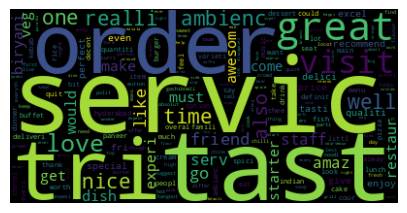

In [ ]:
#positive wordcloud
pos_text = " ".join(review for review in positive_reviews.Review)
pos_wordcloud = WordCloud(collocations = False, background_color = 'black',stopwords=stopword).generate(pos_text)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The positive set of words can be seen in the above word cloud. The words are sized larger to smaller based on their frequency in customer reviews.

**For Negative Sentiments**

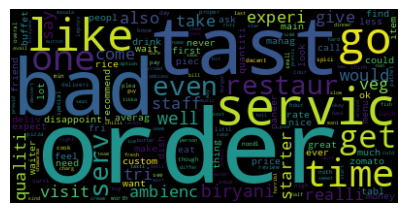

In [ ]:
#negative wordcloud
neg_text = " ".join(review for review in negative_reviews.Review)
neg_wordcloud = WordCloud(collocations = False, background_color = 'black',stopwords=stopword).generate(neg_text)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The negative set of words can be seen in the above word cloud. The words are sized larger to smaller based on their frequency in customer reviews.

**Feature Selection**

In [ ]:
# We will create x and y variables for independent and dependent variable respectively
X = sentiment_df['Review']
y = sentiment_df['sentiment']

We selected the 'Review' column as the input variable for our model, which will be used to build the classification model to predict the 'Sentiment', which is the model's dependent variable.

**Train- Test Split**

In [ ]:
# let's split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
sentiment_df.sentiment.value_counts()

1    6316
0    3639
Name: sentiment, dtype: int64

For the train-test split, we utilised an 75:25 ratio. We can see we have 6316 data for training and 3639 testing which is a fair split to start with as we have kept a good amount of data for training our model.

**Text Vectorization**

In [ ]:
# Vectorizing Text
# let's create tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

Which text vectorization technique have you used and why?

We have used (TFID) Text Frequency Inverse Document as vectorization technique to tranform the textual data into a vector with numerical values to use it in the model for classifying the reviews.

**Term Frequency:**

Term frequency is defined as the number of times a word (i) appears in a document (j) divided by the total number of words in the document.


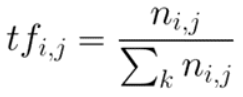

Inverse Document Frequency:

Inverse document frequency refers to the log of the total number of documents divided by the number of documents that contain the word. The logarithm is added to dampen the importance of a very high value of IDF.

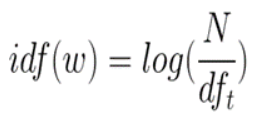

**TFIDF** is computed by multiplying the term frequency with the inverse document frequency.

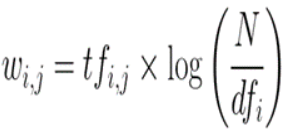

**ML Model Implementation for Sentimental Analysis**

**RANDOM FOREST**

A Random Forest is a type of ensemble learning algoritm that trains multiple decision trees on subsets of the data and then combines their predictions to make a final prediction. This can improve the performance of the model compared to using a single decision tree.

**LOGISTIC REGRESSION**

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no). Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

**K NEAREST NEIGHBOR**

K Nearest neighbor is a type of machine learning algorithm that makes predictions for a sample by finding the most similar samples in the training data and using their labels to make a prediction.

**NAIVE BAYES**

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. Below are the Bayes theorem formula: P(C|A) = P(A|C) P(C)/ P(A)

**SUPPORT VECTOR MACHINES**

Support Vector Amchines(SVMs) are a type of machine learning algorithm that is used for classification and regression tasks, and finds the hyperplane that maximally separates the classes in the data.

**EVALUATION METRICS**

After making sure our data is good and ready we can continue to building our model. In this notebook we will try to build 8 different models with different algorithm. In this step we will create a baseline model for each algorithm using the default paramaeters set by sklearn and after building all 8 of our models we will compare them to see which works best for our case.

To evaluate our model we will use the confusion matrix as our base for the evaluation.


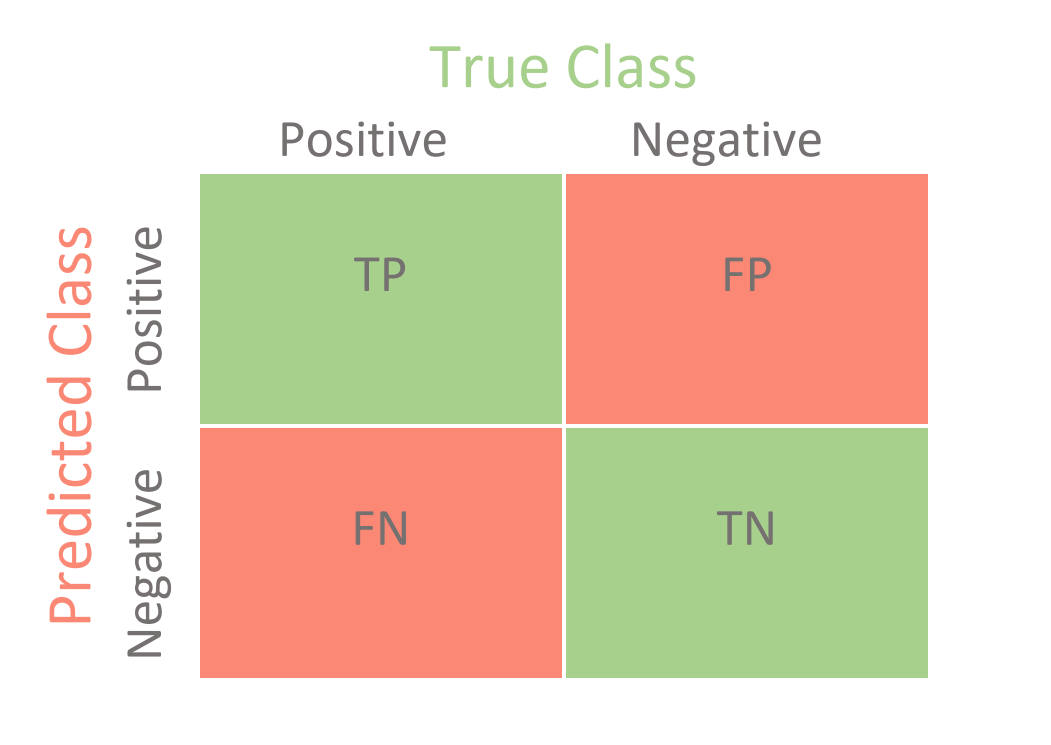

where: TP = True Positive; FP = False Positive; TN = True Negative; FN = False Negative.
We will use 6 metrics below to evaluate models:

1. Accuracy: the proportion of true results among the total number of cases examined.

2. Precision: used to calculate how much proportion of all data that was predicted positive *was* actually positive.

3. Recall: used to calculate how much proportion of actual positives is correctly classified.

4. F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.

5. Area Under Curve (AUC): indicates how well the probabilities from the positive classes are separated from the negative classes



In [ ]:
#Importing all the required libraries for module
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score

In [ ]:
# Let's create class for all models
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=79)
svm = SVC(random_state=6)
lgr = LogisticRegression(solver='liblinear')
xgb = XGBClassifier()

In [ ]:
models = [['XGboost', XGBClassifier()], ['Decision tree', DecisionTreeClassifier()],
          ['KNN', KNeighborsClassifier(n_neighbors=79)],
          ['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['Random forest', RandomForestClassifier(n_estimators=90)],
          ['SVM', SVC(random_state=6)]]

In [ ]:
#Let's create one dataframe which holds the results of the evaluation metric
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,recall_score,accuracy_score,precision_score
model_1_data = []
for name,model in models :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train)
    test_y_predicted = model.predict(X_test)
    model_data['Train_accuracy'] = accuracy_score(y_train,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

In [ ]:
#let's check once
model_1_data = pd.DataFrame(model_1_data)
# model_1_data.drop('Precision',axis=1,inplace=True)
model_1_data

,Name,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
0,XGboost,0.944683,0.848935,0.753498,0.826446,0.788288
1,Decision tree,0.991696,0.757734,0.635091,0.690867,0.661806
2,KNN,0.799625,0.786661,0.472551,0.914583,0.623137
3,Logistic Regression,0.911465,0.860587,0.723358,0.881890,0.794796
4,Random forest,0.991696,0.846525,0.682454,0.879334,0.768485
5,SVM,0.975355,0.867015,0.730893,0.893421,0.804026


In [ ]:
#naming the models to be used
models = {"Decision tree" : dtc,
        "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Logistic Regression" : lgr,
          "XGboost" : xgb}

In [ ]:
#Fitting the models
for key, value in models.items():
    model = value
    model.fit(X_train, y_train)

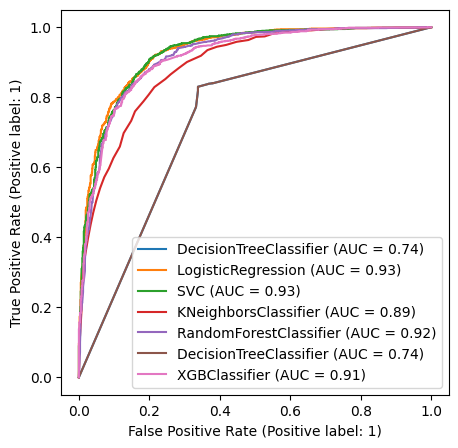

In [ ]:
#ROC curve
from sklearn.metrics import RocCurveDisplay,classification_report

disp = RocCurveDisplay.from_estimator(dtc, X_test, y_test)
plt.rcParams['figure.figsize'] = (16, 10)
RocCurveDisplay.from_estimator(lgr,X_test, y_test, ax = disp.ax_)
RocCurveDisplay.from_estimator(svm,X_test, y_test, ax = disp.ax_)
RocCurveDisplay.from_estimator(knn,X_test, y_test, ax = disp.ax_)
RocCurveDisplay.from_estimator(ran,X_test, y_test, ax = disp.ax_)
RocCurveDisplay.from_estimator(dtc,X_test, y_test, ax = disp.ax_)
RocCurveDisplay.from_estimator(xgb,X_test, y_test, ax = disp.ax_)

**HYPERPARAMETER TUNING**

**LOGISTIC REGRESSION**

In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Let's the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid_lgr = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid_lgr, cv = 5)

logreg_cv.fit(X_train, y_train)

#Let's print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.8660602669665041


In [ ]:
# prediction report
logreg_pred = logreg_cv.predict(X_test)
print(classification_report(y_test,logreg_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8591    0.7417    0.7961       929
           1     0.8577    0.9276    0.8913      1560

    accuracy                         0.8582      2489
   macro avg     0.8584    0.8346    0.8437      2489
weighted avg     0.8582    0.8582    0.8557      2489



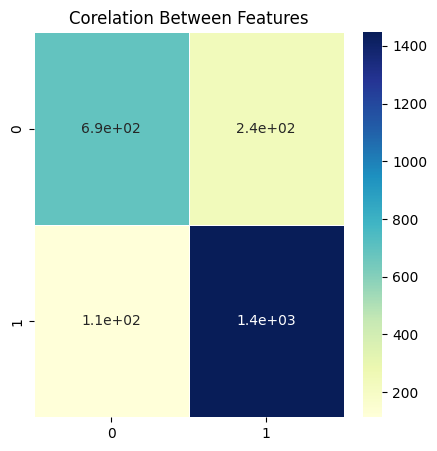

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, logreg_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

**1.Which hyperparameter optimization technique have you used and why?**

We have used Grid Search CV Hyperparameter optimization technique and tried to find the best values of C.We got best params 'C': 3.7. We have also used Cross validation with CV = 5

**2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

After the hyperparameter tuning of Logistic Regression we observed the following improvements in the evaluation metrics.

Accuracy Before: 87.18% || Accuracy After: 87.06%

Precision Before: 75.27% || Precision After:87.77 %

Recall Before: 87.28% || Recall After: 92.73%

F1 Score Before: 80.84%|| F1 Score After: 90.18%

**We have seen that Precision, Recall and F1 Score has increased by tuning the Hyperparameter.**

XG BOOST

In [ ]:
xgbc = XGBClassifier()

from sklearn.model_selection import GridSearchCV

#Let's find the best parameters for XGBRegressor by gridsearchcv
xgb_param = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}

# Instantiating Decision Tree classifier
xgb_cv=GridSearchCV(estimator=xgbc,param_grid=xgb_param,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)

xgb_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

#Finding the best fit
xgb_cv.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[16:41:50] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 125}
Best score is 0.851594066410965


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='entropy',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=125, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
# prediction report
xgb_pred = xgb_cv.predict(X_test)
print(classification_report(y_test,xgb_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8335    0.7384    0.7831       929
           1     0.8541    0.9122    0.8822      1560

    accuracy                         0.8473      2489
   macro avg     0.8438    0.8253    0.8327      2489
weighted avg     0.8465    0.8473    0.8452      2489



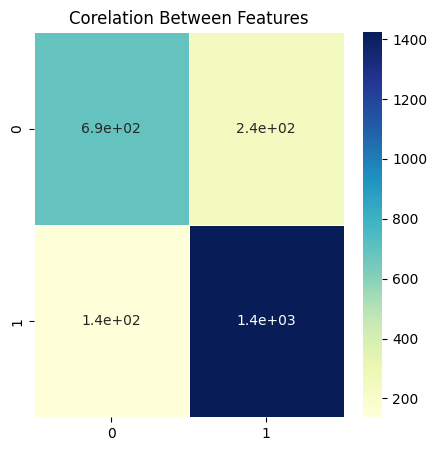

In [ ]:
# confusion matrix
conf_mat = confusion_matrix(y_test, xgb_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

**1.Which hyperparameter optimization technique have you used and why?**

We have used Grid Search CV Hyperparameter optimization technique and tried to find the best values of 'n_estimators','max_depth','criterion': ['entropy'].We got best params combination as {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}. We have also used Cross validation with CV = 3

**2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

After the hyperparameter tuning of XG BOOST we observed the following improvements in the evaluation metrics.

Accuracy Before: 83.84% || Accuracy After: 85.26%

Precision Before: 65.43% || Precision After:87.03 %

Recall Before: 86.28% || Recall After: 90.47%

F1 Score Before: 74.42%|| F1 Score After: 88.72%

We have seen that all the metrics have increased after tuning the hyperparameter.

**LIGHT GRADIENT BOOSTING MACHINE**

In [ ]:
lgbc = lgb.LGBMClassifier()

from sklearn.model_selection import GridSearchCV

# let's find the best parameters for XGBRegressor by gridsearchcv
lgbm_para={'n_estimators': [100,125,150],'max_depth': [15,20,25]}

# Instantiating Decision Tree classifier
lgbm_cv = GridSearchCV(estimator=lgbc ,param_grid=lgbm_para,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)

lgbm_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(lgbm_cv.best_params_))
print("Best score is {}".format(lgbm_cv.best_score_))

#Finding the best fit
lgbm_cv.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4756, number of negative: 2710
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 41657
[LightGBM] [Info] Number of data points in the train set: 7466, number of used features: 1128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.637021 -> initscore=0.562458
[LightGBM] [Info] Start training from score 0.562458
Tuned Decision Tree Parameters: {'max_depth': 25, 'n_estimators': 150}
Best score is 0.8577554745704249


LGBMClassifier(max_depth=25, n_estimators=150)

In [ ]:
# report
lgbm_pred = lgbm_cv.predict(X_test)
print(classification_report(y_test,lgbm_pred,digits=4))

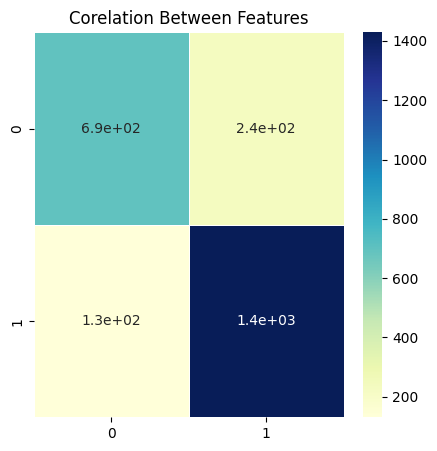

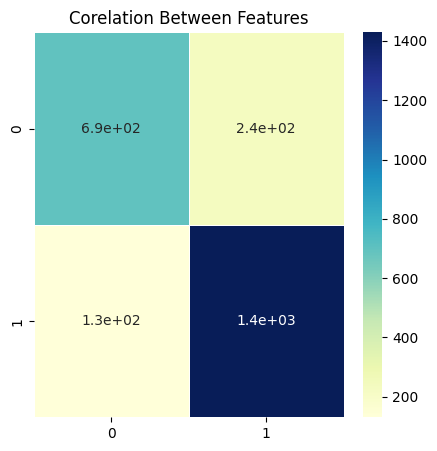

In [ ]:
# confusion matrix
conf_mat = confusion_matrix(y_test, lgbm_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

1.Which hyperparameter optimization technique have you used and why?

We have used Grid Search CV Hyperparameter optimization technique and tried to find the best values of 'n_estimators','max_depth'.We got best params combination as {'max_depth': 25, 'n_estimators': 100}. We have also used Cross validation with CV = 3

2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After the hyperparameter tuning of Logistic Regression we observed the following improvements in the evaluation metrics.

Accuracy Before: 85.69% || Accuracy After: 85.98%

Precision Before: 76.84% || Precision After:87.99 %

Recall Before: 82.17% || Recall After: 90.47%

F1 Score Before: 79.42%|| F1 Score After: 89.21%

**We have seen that Precision, Recall and F1 Score has increased by tuning the Hyperparameter.**

# **1.Which Evaluation metrics did you consider for a positive business impact and why?**

As our goal is to categorise the Customer's Sentiments based on their response, **PRECISION** value becomes the most crucial evaluation metric in this situation. This is because each class needs to be properly classified by the classification model we have built.

# **2.Which ML model did you choose from the above created models as your final prediction model and why?**

Based on the Accuracy, Precision, and Recall values, we can eventually choose **LOGISTIC REGRESSION** as the best model based on the training of several models and hyperparameter tuning of the best three models.

> With high Precision values for both the classes we can say that our model predicts them accurately most of the times.

> Recall value has the highest scores out of all the metrics, which reflects the correct prediction of the true positives with respect to the total actual positives(class 1).

> Since both precision and recall value has better results the F1 score which is the combination of the two, also has a better number, in comparision to the other models.

> Better outcomes of true positives will lead to better area under the curve which is evident from the AUC-ROC plot.

# **Hurrah! I have successfully completed my Machine Learning Capstone Project !!!**